# Telecom Churn

## Steps:-
1. Read, understand and prepare the data
2. Exploratory Data Analysis
3. Outlier Analysis / Transformation / Treatment
4. Modelling
5. Model accurance & Metrics
6. Final analysis and conclusions

## Contents:
1. Data Preparation
2. Buidling prediction model via logistic regression and Random Forest
3. using logistic regression to extract the top features / predictors

In [386]:
#Loading Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from matplotlib.pyplot import xticks
%matplotlib inline
import matplotlib.ticker as mtick
import os
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

os.chdir("C:/Users/aliborious/Desktop/Py/Telecom Churn")

In [387]:
#ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#Balancing
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

## Read and Analyze Dataset

In [388]:
#Reading Dataset
telecom = pd.read_csv("telecom_churn_data.csv")
data = telecom.copy()
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [389]:
# Missing data check

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print("Missing Data" '\n', missing_data(data),'\n')
print("Shape" '\n', data.shape,'\n')
print("Data Type" '\n', data.info(verbose=True))

Missing Data
                           Total  Percent
count_rech_2g_6           74846    74.85
date_of_last_rech_data_6  74846    74.85
count_rech_3g_6           74846    74.85
av_rech_amt_data_6        74846    74.85
max_rech_data_6           74846    74.85
total_rech_data_6         74846    74.85
arpu_3g_6                 74846    74.85
arpu_2g_6                 74846    74.85
night_pck_user_6          74846    74.85
fb_user_6                 74846    74.85
arpu_3g_7                 74428    74.43
count_rech_2g_7           74428    74.43
fb_user_7                 74428    74.43
count_rech_3g_7           74428    74.43
arpu_2g_7                 74428    74.43
av_rech_amt_data_7        74428    74.43
max_rech_data_7           74428    74.43
night_pck_user_7          74428    74.43
total_rech_data_7         74428    74.43
date_of_last_rech_data_7  74428    74.43
night_pck_user_9          74077    74.08
date_of_last_rech_data_9  74077    74.08
fb_user_9                 74077    74.08
ar

In [390]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
print(percent[percent>50],'\n')
print("Number of coulmns with more than 50% missing values", percent[percent>50].shape)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

## Insights:
1. There are 99999 rows and 226 columns
2. There are 214 numerical columns while rest are object
3. The data set has 166 (out of 226) columns with missing values
4. Among above 40 columns have more than 50% missing values
5. Various attributes with sufixes 6, 7, 8 and 9 which corresponds to months June , July, August and September respectively have missing values ~74%
6. Also each month data has same percent of missing values. Ex: All attributes with suffix 9 has 74.08% missing values

In [391]:
# Checking if all mobile numbers are unique thereby confirming all user entries are unique
data['mobile_number'].nunique()

99999

## Insights
1. The number of unique mobile numbers is equal to the total number of rows present in the dataset
2. Hence mobile number can be used as a unique index to represent each customer/user

In [392]:
data.set_index('mobile_number', inplace = True)
data.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7001865778           109             0.0             0.0             0.0   
7001625959           109             0.0             0.0             0.0   
7001204172           109             0.0             0.0             0.0   
7000142493           109             0.0             0.0             0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753               6/30/2014            7/31/2014            8/31/2014   
7001865778               6/30/2014            7/31/2014            8/31/2014   
7001625959               6/30/2014            7/31/2014            8/31/2014   
7001204172               6/30/2014            7/31/2014            8/31/2014   
7000142493               6/30/2014            7/31/2014            8/31/2014   

              last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  \
mobile_number                                                            
7000842753               9/30/2014  197.385  214.816  213.803   21.100   
7001865778               9/30/2014   34.047  355.074  268.321   86.285   
7001625959               9/30/2014  167.690  189.058  210.226  290.714   
7001204172               9/30/2014  221.338  251.102  508.054  389.500   
7000142493               9/30/2014  261.636  309.876  238.174  163.426   

               onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
mobile_number                                                       
7000842753             NaN          NaN         0.00          NaN   
7001865778           24.11        78.68         7.68        18.34   
7001625959           11.54        55.24        37.26        74.81   
7001204172           99.91        54.39       310.98       241.71   
7000142493           50.31       149.44        83.89        58.78   

               offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
mobile_number                                                           
7000842753              NaN           NaN          0.00           NaN   
7001865778            15.74         99.84        304.76         53.76   
7001625959           143.33        220.59        208.36        118.91   
7001204172           123.31        109.01         71.68        113.54   
7000142493            76.96         91.88        124.26         45.81   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
mobile_number                                                               
7000842753               NaN            NaN           0.00            NaN   
7001865778               0.0           0.00           0.00           0.00   
7001625959               0.0           0.00           0.00          38.49   
7001204172               0.0          54.86          44.38           0.00   
7000142493               0.0           0.00           0.00           0.00   

               roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
mobile_number                                                               
7000842753               NaN            NaN           0.00            NaN   
7001865778               0.0           0.00           0.00           0.00   
7001625959               0.0           0.00           0.00          70.94   
7001204172               0.0          28.09          39.04           0.00   
7000142493               0.0           0.00           0.00           0.00   

               loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
mobile_number                                                         
7000842753                  NaN               NaN              0.00   
7001865778                23.88             74.56              7.68   
7001625959                 7.19           

In [393]:
# statistics
data.describe(percentiles=[.25,.5,.70,.75,.80,.90,.95],include = 'all').round(2)

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count     99999.0         98981.0         98981.0         98981.0   
unique        NaN             NaN             NaN             NaN   
top           NaN             NaN             NaN             NaN   
freq          NaN             NaN             NaN             NaN   
mean        109.0             0.0             0.0             0.0   
std           0.0             0.0             0.0             0.0   
min         109.0             0.0             0.0             0.0   
25%         109.0             0.0             0.0             0.0   
50%         109.0             0.0             0.0             0.0   
70%         109.0             0.0             0.0             0.0   
75%         109.0             0.0             0.0             0.0   
80%         109.0             0.0             0.0             0.0   
90%         109.0             0.0             0.0             0.0   
95%         109.0             0.0             0.0             0.0   
max         109.0             0.0             0.0             0.0   

       last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
70%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
80%                     NaN                  NaN                  NaN   
90%                     NaN                  NaN                  NaN   
95%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

       last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  \
count                 98340  99999.00  99999.00  99999.00  99999.00   
unique                    1       NaN       NaN       NaN       NaN   
top               9/30/2014       NaN       NaN       NaN       NaN   
freq                  98340       NaN       NaN       NaN       NaN   
mean                    NaN    282.99    278.54    279.15    261.65   
std                     NaN    328.44    338.16    344.47    342.00   
min                     NaN  -2258.71  -2014.04   -945.81  -1899.50   
25%                     NaN     93.41     86.98     84.13     62.68   
50%                     NaN    197.70    191.64    192.08    176.85   
70%                     NaN    324.84    317.91    322.13    305.97   
75%                     NaN    371.06    365.34    369.37    353.47   
80%                     NaN    429.79    423.77    427.78    412.07   
90%                     NaN    620.08    617.25    618.16    601.54   
95%                     NaN    829.49    828.36    833.30    805.11   
max                     NaN  27731.09  35145.83  33543.62  38805.62   

        onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count      96062.00     96140.00     94621.00     92254.00      96062.00   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean         132.40       133.67       133.02       130.30        197.94   
std          297.21       308.79       308.95       308.48        316.85   
min            0.00         0.00         0.00         0.00       

In [394]:
data.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=225)

In [395]:
data.shape

(99999, 225)

## Data Preparation

In [396]:
# Check the date columns which are of data type object and convert to date/time format
date_columns = data.columns[data.columns.str.contains('date')]
date_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [397]:
data[date_columns] = data[date_columns].apply(pd.to_datetime)

In [398]:
# converting all blank cells to NA
data = data.replace(" ",np.nan)
data.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7001865778           109             0.0             0.0             0.0   
7001625959           109             0.0             0.0             0.0   
7001204172           109             0.0             0.0             0.0   
7000142493           109             0.0             0.0             0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753              2014-06-30           2014-07-31           2014-08-31   
7001865778              2014-06-30           2014-07-31           2014-08-31   
7001625959              2014-06-30           2014-07-31           2014-08-31   
7001204172              2014-06-30           2014-07-31           2014-08-31   
7000142493              2014-06-30           2014-07-31           2014-08-31   

              last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  \
mobile_number                                                            
7000842753              2014-09-30  197.385  214.816  213.803   21.100   
7001865778              2014-09-30   34.047  355.074  268.321   86.285   
7001625959              2014-09-30  167.690  189.058  210.226  290.714   
7001204172              2014-09-30  221.338  251.102  508.054  389.500   
7000142493              2014-09-30  261.636  309.876  238.174  163.426   

               onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
mobile_number                                                       
7000842753             NaN          NaN         0.00          NaN   
7001865778           24.11        78.68         7.68        18.34   
7001625959           11.54        55.24        37.26        74.81   
7001204172           99.91        54.39       310.98       241.71   
7000142493           50.31       149.44        83.89        58.78   

               offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
mobile_number                                                           
7000842753              NaN           NaN          0.00           NaN   
7001865778            15.74         99.84        304.76         53.76   
7001625959           143.33        220.59        208.36        118.91   
7001204172           123.31        109.01         71.68        113.54   
7000142493            76.96         91.88        124.26         45.81   

               roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
mobile_number                                                               
7000842753               NaN            NaN           0.00            NaN   
7001865778               0.0           0.00           0.00           0.00   
7001625959               0.0           0.00           0.00          38.49   
7001204172               0.0          54.86          44.38           0.00   
7000142493               0.0           0.00           0.00           0.00   

               roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
mobile_number                                                               
7000842753               NaN            NaN           0.00            NaN   
7001865778               0.0           0.00           0.00           0.00   
7001625959               0.0           0.00           0.00          70.94   
7001204172               0.0          28.09          39.04           0.00   
7000142493               0.0           0.00           0.00           0.00   

               loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
mobile_number                                                         
7000842753                  NaN               NaN              0.00   
7001865778                23.88             74.56              7.68   
7001625959                 7.19           

In [399]:
data[percent[percent == 74.08].index].describe()

night_pck_user_9     fb_user_9     arpu_2g_9  max_rech_data_9  \
count      25922.000000  25922.000000  25922.000000      25922.00000   
mean           0.015971      0.860968     93.712026        124.94144   
std            0.125366      0.345987    171.384224        111.36376   
min            0.000000      0.000000    -45.740000          1.00000   
25%            0.000000      1.000000      0.000000         25.00000   
50%            0.000000      1.000000     14.800000        145.00000   
75%            0.000000      1.000000    140.010000        179.00000   
max            1.000000      1.000000   3467.170000       1555.00000   

          arpu_3g_9  total_rech_data_9  av_rech_amt_data_9  count_rech_3g_9  \
count  25922.000000       25922.000000        25922.000000     25922.000000   
mean     100.264116           2.441170          192.734315         0.659363   
std      216.291992           2.516339          188.400286         1.411513   
min      -71.090000           1.000000            1.000000         0.000000   
25%        0.000000           1.000000           69.000000         0.000000   
50%        2.605000           2.000000          164.000000         0.000000   
75%      140.010000           3.000000          252.000000         1.000000   
max    13884.310000          84.000000         4061.000000        49.000000   

       count_rech_2g_9  
count     25922.000000  
mean          1.781807  
std           2.214701  
min           0.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max          40.000000

In [400]:
data[percent[percent == 73.66].index].describe()

fb_user_8  av_rech_amt_data_8  count_rech_3g_8  count_rech_2g_8  \
count  26339.000000        26339.000000     26339.000000     26339.000000   
mean       0.890808          197.526489         0.635711         2.016288   
std        0.311885          191.301305         1.422827         2.720132   
min        0.000000            0.500000         0.000000         0.000000   
25%        1.000000           87.000000         0.000000         1.000000   
50%        1.000000          154.000000         0.000000         1.000000   
75%        1.000000          252.000000         1.000000         2.000000   
max        1.000000         4076.000000        45.000000        44.000000   

       total_rech_data_8  max_rech_data_8     arpu_3g_8     arpu_2g_8  \
count       26339.000000     26339.000000  26339.000000  26339.000000   
mean            2.651999       125.717301     91.173849     86.599478   
std             3.074987       109.437851    188.180936    168.247852   
min             1.000000         1.000000    -24.490000    -55.830000   
25%             1.000000        25.000000      0.000000      0.000000   
50%             1.000000       145.000000      0.880000      9.270000   
75%             3.000000       179.000000    122.070000    122.070000   
max            60.000000      1555.000000   3716.900000   3483.170000   

       night_pck_user_8  
count      26339.000000  
mean           0.020844  
std            0.142863  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [401]:
data[percent[percent == 74.43].index].describe()

arpu_3g_7  count_rech_2g_7     fb_user_7  count_rech_3g_7  \
count  25571.000000     25571.000000  25571.000000     25571.000000   
mean      89.384120         2.044699      0.908764         0.621720   
std      195.893924         2.768332      0.287950         1.394524   
min      -26.040000         0.000000      0.000000         0.000000   
25%        0.000000         1.000000      1.000000         0.000000   
50%        0.420000         1.000000      1.000000         0.000000   
75%      119.560000         2.000000      1.000000         1.000000   
max     4980.900000        48.000000      1.000000        35.000000   

          arpu_2g_7  av_rech_amt_data_7  max_rech_data_7  night_pck_user_7  \
count  25571.000000        25571.000000     25571.000000      25571.000000   
mean      85.914450          200.981292       126.729459          0.023034   
std      176.379871          196.791224       109.765267          0.150014   
min      -15.480000            0.500000         1.000000          0.000000   
25%        0.000000           92.000000        25.000000          0.000000   
50%        8.810000          154.000000       145.000000          0.000000   
75%      122.070000          252.000000       177.000000          0.000000   
max     4809.360000         4365.000000      1555.000000          1.000000   

       total_rech_data_7  
count       25571.000000  
mean            2.666419  
std             3.031593  
min             1.000000  
25%             1.000000  
50%             1.000000  
75%             3.000000  
max            54.000000

In [402]:
data[percent[percent == 74.85].index].describe()

count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  max_rech_data_6  \
count     25153.000000     25153.000000        25153.000000     25153.000000   
mean          1.864668         0.599133          192.600982       126.393392   
std           2.570254         1.274428          192.646318       108.477235   
min           0.000000         0.000000            1.000000         1.000000   
25%           1.000000         0.000000           82.000000        25.000000   
50%           1.000000         0.000000          154.000000       145.000000   
75%           2.000000         1.000000          252.000000       177.000000   
max          42.000000        29.000000         7546.000000      1555.000000   

       total_rech_data_6     arpu_3g_6     arpu_2g_6  night_pck_user_6  \
count       25153.000000  25153.000000  25153.000000      25153.000000   
mean            2.463802     89.555057     86.398003          0.025086   
std             2.789128    193.124653    172.767523          0.156391   
min             1.000000    -30.820000    -35.830000          0.000000   
25%             1.000000      0.000000      0.000000          0.000000   
50%             1.000000      0.480000     10.830000          0.000000   
75%             3.000000    122.070000    122.070000          0.000000   
max            61.000000   6362.280000   6433.760000          1.000000   

          fb_user_6  
count  25153.000000  
mean       0.914404  
std        0.279772  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

## Insights: (Missing value columns)
1. The minimum values for the columns indicating "Average revenue per user" for various months are negative. This seems little off as revenue cannot be negative in this case but zero
2. For rest columns the minimum value is either zero or one
3. Hence imputing all the negative and blank cells with zero as it will not interfere with any statistics or the modelling process

# Missing Value Treatment

In [403]:
percent50 = percent[percent>50]

In [404]:
months = [6,7,8,9]
month_list = []
for i in months:
    month_list.append(list(percent50[percent50.index.str.contains(str(i))].index))

for i in month_list:
    print(100*data[i].isnull().all(axis = 1).value_counts()/data.shape[0])

True     74.846748
False    25.153252
dtype: float64
True     74.428744
False    25.571256
dtype: float64
True     73.660737
False    26.339263
dtype: float64
True     74.077741
False    25.922259
dtype: float64


In [405]:
# Imputing blanks with zero for columns having >70% missing values
for i in month_list:
    data[i] = data[i].fillna(value = 0)

In [406]:
percent1 = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
print(percent1[percent1 > 0].shape)
percent1[percent1 > 0].value_counts()

(126,)


3.94    29
3.86    29
5.38    29
7.75    29
1.02     3
1.10     1
0.60     1
1.77     1
1.66     1
3.62     1
4.76     1
1.61     1
dtype: int64

In [407]:
# quick check on each percentage values (3.94)
percent1[percent1 == 3.94]

std_ic_t2f_mou_6    3.94
loc_ic_t2m_mou_6    3.94
og_others_6         3.94
loc_og_t2t_mou_6    3.94
loc_ic_t2f_mou_6    3.94
roam_og_mou_6       3.94
loc_ic_mou_6        3.94
isd_ic_mou_6        3.94
roam_ic_mou_6       3.94
spl_ic_mou_6        3.94
loc_ic_t2t_mou_6    3.94
std_ic_t2t_mou_6    3.94
loc_og_t2m_mou_6    3.94
offnet_mou_6        3.94
std_ic_t2m_mou_6    3.94
std_ic_mou_6        3.94
onnet_mou_6         3.94
std_og_t2t_mou_6    3.94
ic_others_6         3.94
std_og_t2c_mou_6    3.94
isd_og_mou_6        3.94
std_og_t2m_mou_6    3.94
loc_og_mou_6        3.94
std_og_t2f_mou_6    3.94
loc_og_t2c_mou_6    3.94
spl_og_mou_6        3.94
std_og_mou_6        3.94
loc_og_t2f_mou_6    3.94
std_ic_t2o_mou_6    3.94
dtype: float64

In [408]:
# quick check on each percentage values (3.86)
percent1[percent1 == 3.86]

std_ic_t2o_mou_7    3.86
std_og_t2c_mou_7    3.86
loc_og_mou_7        3.86
loc_ic_t2f_mou_7    3.86
loc_ic_mou_7        3.86
std_og_t2m_mou_7    3.86
std_ic_t2t_mou_7    3.86
std_ic_t2m_mou_7    3.86
og_others_7         3.86
std_ic_t2f_mou_7    3.86
std_og_t2f_mou_7    3.86
loc_og_t2m_mou_7    3.86
loc_og_t2c_mou_7    3.86
onnet_mou_7         3.86
loc_og_t2t_mou_7    3.86
std_ic_mou_7        3.86
spl_og_mou_7        3.86
offnet_mou_7        3.86
isd_ic_mou_7        3.86
loc_og_t2f_mou_7    3.86
loc_ic_t2t_mou_7    3.86
roam_og_mou_7       3.86
std_og_mou_7        3.86
spl_ic_mou_7        3.86
loc_ic_t2m_mou_7    3.86
ic_others_7         3.86
std_og_t2t_mou_7    3.86
roam_ic_mou_7       3.86
isd_og_mou_7        3.86
dtype: float64

## Insights:
1. Similar to 70% missing values here too each month data has same number of missing values (29 columns ofr each percentage)
2. Hence the first four values in above output with 29 columns for each percentages can be imputed with zero as it will not affect the results. The reason all above 29 coulmns correspond to call details like local, std and other service usage details.

In [409]:
percent3 = percent1[percent1>=3.8]
months = [6,7,8,9]
month_list = []
for i in months:
    month_list.append(list(percent3[percent3.index.str.contains(str(i))].index))

for i in month_list:
    print(100*data[i].isnull().all(axis = 1).value_counts()/data.shape[0])

False    96.062961
True      3.937039
dtype: float64
False    96.140961
True      3.859039
dtype: float64
False    94.621946
True      5.378054
dtype: float64
False    97.112971
True      2.887029
dtype: float64


In [410]:
for i in month_list:
    data[i] = data[i].fillna(value = 0)

In [411]:
# Final check on remaining missing values
percent2 = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
print(percent2[percent2 > 0].shape)
percent2[percent2 > 0]

(9,)


date_of_last_rech_8     3.62
date_of_last_rech_7     1.77
last_date_of_month_9    1.66
date_of_last_rech_6     1.61
last_date_of_month_8    1.10
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
dtype: float64

## Insights:
1. Last date of month is missing for few months which can be easily imputed with last date
2. Date of recharge for each month can be imputed as zero as it indicates no charge

In [412]:
# last_date_of_month_9
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].unique()[0])
# last_date_of_month_8
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].unique()[0])
# last_date_of_month_7
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].unique()[0])

In [413]:
# date_of_last_rech_8
data['date_of_last_rech_8'] = data['date_of_last_rech_8'].fillna(value = 0)
# date_of_last_rech_7
data['date_of_last_rech_7'] = data['date_of_last_rech_7'].fillna(value = 0)
# date_of_last_rech_6
data['date_of_last_rech_6'] = data['date_of_last_rech_6'].fillna(value = 0)

In [414]:
percent3 = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
percent3[percent3 > 0]

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
dtype: float64

# Filtering high-value customers

1. As mentioned in the problem statement / business instructions, only for the high-value customers churn has to ne predicted.
2. Definition of high-value customers: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [415]:
# Recharge columns
recharge = data.columns[data.columns.str.contains('rech')]
recharge

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [416]:
# finding recharge amount for data
data['total_rech_amt_data_6'] = data.total_rech_data_6*data.av_rech_amt_data_6
data['total_rech_amt_data_7'] = data.total_rech_data_7*data.av_rech_amt_data_7
data['total_rech_amt_data_8'] = data.total_rech_data_8*data.av_rech_amt_data_8

In [417]:
# creating new feature to filter high value customers
# Average recharge amount for good period (month 6 & 7)
data['average_amt_good'] = (data['total_rech_amt_6']+ data['total_rech_amt_7']+ data['total_rech_amt_data_6'] 
                            + data['total_rech_amt_data_7'])/4

In [418]:
data1 = data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7','average_amt_good']]
data1.head()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_data_6  \
mobile_number                                                              
7000842753                  362               252                  252.0   
7001865778                   74               384                    0.0   
7001625959                  168               315                    0.0   
7001204172                  230               310                    0.0   
7000142493                  196               350                   56.0   

               total_rech_amt_data_7  average_amt_good  
mobile_number                                           
7000842753                     252.0            279.50  
7001865778                     154.0            153.00  
7001625959                       0.0            120.75  
7001204172                       0.0            135.00  
7000142493                       0.0            150.50

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Avg. Recharge Amount during Good Phase')

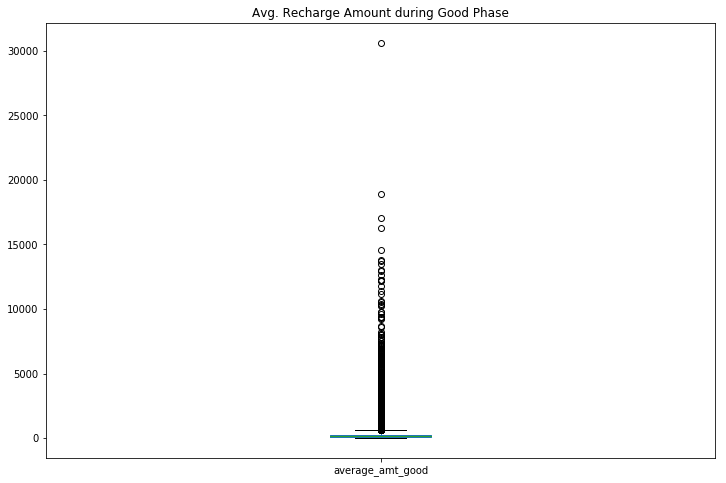

In [419]:
plt.figure(figsize = (12,8))
data['average_amt_good'].plot(kind='box')
plt.title('Avg. Recharge Amount during Good Phase')
plt.show()

In [420]:
data['average_amt_good'].describe(percentiles=[.25,.5,.70,.75,.80,.90,.95,.96,.97,.98,.99]).round(2)

count    99999.00
mean       242.66
std        434.71
min          0.00
25%         64.00
50%        137.50
70%        239.00
75%        276.50
80%        328.25
90%        514.00
95%        756.00
96%        859.25
97%        995.75
98%       1210.01
99%       1681.76
max      30618.00
Name: average_amt_good, dtype: float64

## Insights:
1. The presence of outliers are evident from the box plot
2. Outlier treatment might be needed

In [421]:
A = data['average_amt_good'].quantile(0.7)
highvalue_df = data[(data['average_amt_good'] >= A)]
highvalue_df.shape

(30001, 229)

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Avg. Recharge Amount during Good Phase')

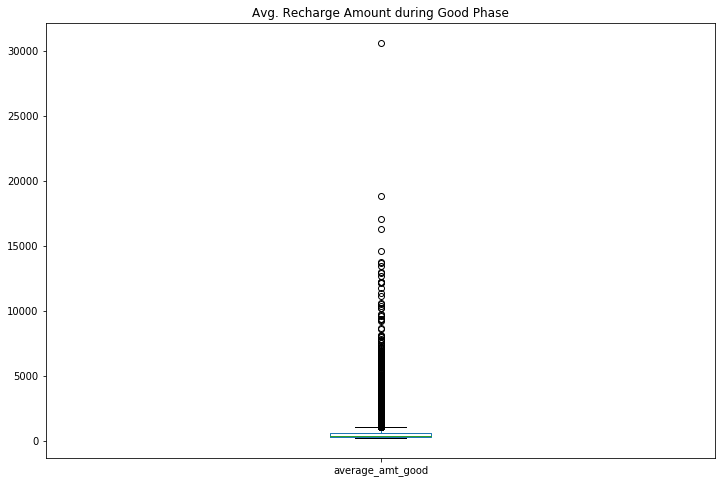

In [422]:
plt.figure(figsize = (12,8))
highvalue_df['average_amt_good'].plot(kind='box')
plt.title('Avg. Recharge Amount during Good Phase')
plt.show()

In [423]:
highvalue_df['average_amt_good'].describe(percentiles=[.70,.80,.90,.95,.99,.997,.999]).round(2)

count    30001.00
mean       576.31
std        679.36
min        239.00
50%        400.00
70%        546.25
80%        684.00
90%        995.75
95%       1399.25
99%       3045.25
99.7%     5470.50
99.9%     8704.25
max      30618.00
Name: average_amt_good, dtype: float64

## Insights:
1. In both abohighval_finalve the box plots it is very evident that after 99% the outlier presence is very high
2. In order to get a decent model and also not loose any important data: data point upto 99% is considered

In [424]:
B = data['average_amt_good'].quantile(0.99)
highvalue = highvalue_df[(highvalue_df['average_amt_good'] <= B)]
highvalue.shape

(29001, 229)

In [425]:
highval_final = highvalue.copy()

In [426]:
# Deleting the remaining blank / NA values
highval_final = highval_final.dropna(how='any',axis=0)

In [427]:
missing_data(highval_final)

Total  Percent
average_amt_good              0      0.0
loc_ic_t2t_mou_6              0      0.0
total_og_mou_8                0      0.0
total_og_mou_7                0      0.0
total_og_mou_6                0      0.0
og_others_9                   0      0.0
og_others_8                   0      0.0
og_others_7                   0      0.0
og_others_6                   0      0.0
spl_og_mou_9                  0      0.0
spl_og_mou_8                  0      0.0
spl_og_mou_7                  0      0.0
spl_og_mou_6                  0      0.0
isd_og_mou_9                  0      0.0
isd_og_mou_8                  0      0.0
isd_og_mou_7                  0      0.0
isd_og_mou_6                  0      0.0
std_og_mou_9                  0      0.0
std_og_mou_8                  0      0.0
std_og_mou_7                  0      0.0
std_og_mou_6                  0      0.0
std_og_t2c_mou_9              0      0.0
std_og_t2c_mou_8              0      0.0
std_og_t2c_mou_7              0      0.0
std_og_t2c_mou_6              0      0.0
std_og_t2f_mou_9              0      0.0
std_og_t2f_mou_8              0      0.0
total_og_mou_9                0      0.0
loc_ic_t2t_mou_7              0      0.0
std_ic_t2o_mou_7              0      0.0
...                         ...      ...
std_ic_mou_6                  0      0.0
total_rech_amt_7              0      0.0
total_rech_amt_8              0      0.0
total_rech_amt_9              0      0.0
date_of_last_rech_data_7      0      0.0
count_rech_2g_6               0      0.0
max_rech_data_9               0      0.0
max_rech_data_8               0      0.0
max_rech_data_7               0      0.0
max_rech_data_6               0      0.0
total_rech_data_9             0      0.0
total_rech_data_8             0      0.0
total_rech_data_7             0      0.0
total_rech_data_6             0      0.0
date_of_last_rech_data_9      0      0.0
date_of_last_rech_data_8      0      0.0
date_of_last_rech_data_6      0      0.0
max_rech_amt_6                0      0.0
last_day_rch_amt_9            0      0.0
last_day_rch_amt_8            0      0.0
last_day_rch_amt_7            0      0.0
last_day_rch_amt_6            0      0.0
date_of_last_rech_9           0      0.0
date_of_last_rech_8           0      0.0
date_of_last_rech_7           0      0.0
date_of_last_rech_6           0      0.0
max_rech_amt_9                0      0.0
max_rech_amt_8                0      0.0
max_rech_amt_7                0      0.0
circle_id                     0      0.0

[229 rows x 2 columns]

## Insights:
1. The data is clean now and can be used for further process

# Tagging Churners

Churned customers (churn=1, else 0) can be tagged based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes that need to be used to tag churners are:
1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

In [428]:
highval_final[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
mobile_number                                                          
7000842753               0.00            0.00         0.00         0.00
7000701601               0.00            0.00         0.00         0.00
7001524846              34.91          142.18         0.00         0.00
7002124215             252.61         1031.53         0.00         0.00
7000887461             127.48          127.63        13.93       314.74

In [429]:
#Creating column for churn and classifying churned customers
highval_final['churn'] = 0
highval_final['churn'].head()

mobile_number
7000842753    0
7000701601    0
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int64

In [430]:
churned = (highval_final.total_ic_mou_9 == 0) & (highval_final.total_og_mou_9 == 0) & (highval_final.vol_2g_mb_9 == 0) & (highval_final.vol_3g_mb_9 == 0)
highval_final.loc[churned,'churn'] = 1

In [431]:
# Churn Rate
round(100*highval_final.churn.sum()/len(churned),2)

7.98

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Churn Data')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

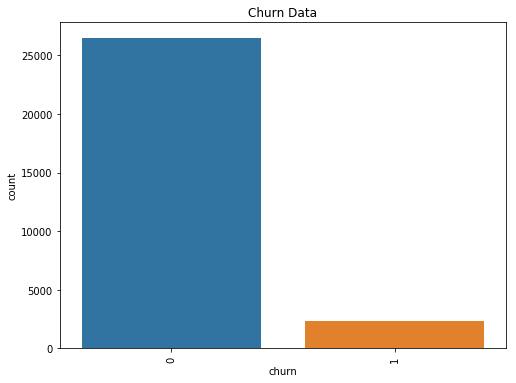

In [432]:
plt.figure(figsize=(8, 6)) 
plt.title("Churn Data")
sns.countplot(x = "churn", data = highval_final)
xticks(rotation = 90)

## Insights:
1. The churn rate is 7.98%
2. From the rate and plot it is very clear that there is high imbalance

In [433]:
# Deleting all columns of month 9 as these values have to be predicted
month9 = highval_final.columns[highval_final.columns.str.contains('_9')]
print(month9)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [434]:
highval_final.drop(month9, axis=1, inplace = True)
highval_final.shape

(28788, 176)

# Exploratory Data Analysis (EDA)

As mentioned in the business statement below steps will be performed now
1. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
2. Derive new features

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Age on Network Vs Churn Data')

Text(0, 0.5, 'Avg. Age of Network')

Text(0.5, 0, 'Churn')

Churned =  871.8619939050936
Not Churned =  1252.0717979691217


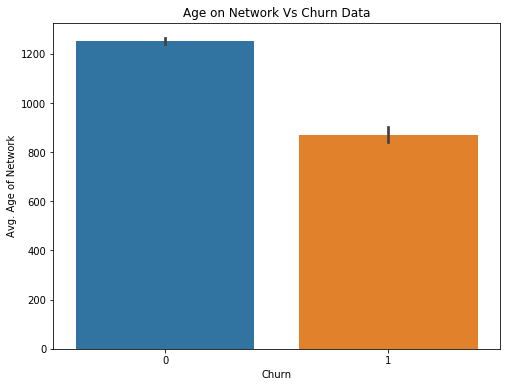

In [435]:
# AON(Age on network) - number of days the customer is using the operator T network
plt.figure(figsize=(8,6))
plt.title("Age on Network Vs Churn Data")
sns.barplot(x = 'churn', y = 'aon', data = highval_final)
plt.ylabel('Avg. Age of Network')
plt.xlabel('Churn')
print("Churned = ", highval_final.loc[highval_final.churn == 1, 'aon'].mean())
print("Not Churned = ", highval_final.loc[highval_final.churn == 0, 'aon'].mean())

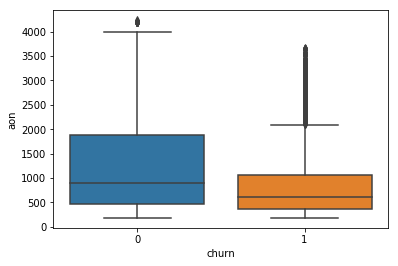

In [436]:
sns.boxplot(y = 'aon', x = 'churn', data = highval_final)
plt.show()

## Insights:
1. Age on network seem to be good indicator or churn
2. The average age on network for churned customers approximately around 870 days

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Total Recharge Amount (June)')

Text(0, 0.5, 'Avg. Recharge Amount')

Text(0.5, 0, 'Churn')

Churned =  771.4140182847192
Not Churned =  630.1905930315957


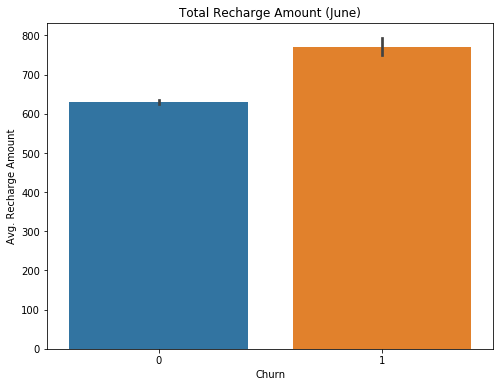

In [437]:
# Total Recharge Amount
# June
plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount (June)")
sns.barplot(x = 'churn', y = 'total_rech_amt_6', data = highval_final)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
print("Churned = ", highval_final.loc[highval_final.churn == 1, 'total_rech_amt_6'].mean())
print("Not Churned = ", highval_final.loc[highval_final.churn == 0, 'total_rech_amt_6'].mean())

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Total Recharge Amount (July)')

Text(0, 0.5, 'Avg. Recharge Amount')

Text(0.5, 0, 'Churn')

Churned =  613.2263822377014
Not Churned =  642.2913442301159


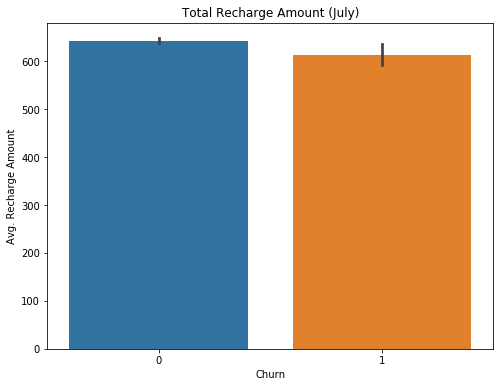

In [438]:
# July
plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount (July)")
sns.barplot(x = 'churn', y = 'total_rech_amt_7', data = highval_final)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
print("Churned = ", highval_final.loc[highval_final.churn == 1, 'total_rech_amt_7'].mean())
print("Not Churned = ", highval_final.loc[highval_final.churn == 0, 'total_rech_amt_7'].mean())

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Total Recharge Amount (August)')

Text(0, 0.5, 'Avg. Recharge Amount')

Text(0.5, 0, 'Churn')

Churned =  244.32477144101
Not Churned =  596.1673398512703


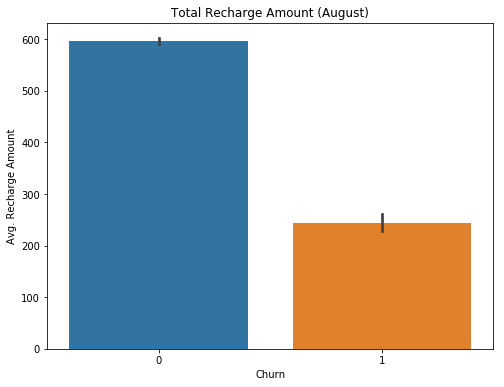

In [439]:
plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount (August)")
sns.barplot(x = 'churn', y = 'total_rech_amt_8', data = highval_final)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
print("Churned = ", highval_final.loc[highval_final.churn == 1, 'total_rech_amt_8'].mean())
print("Not Churned = ", highval_final.loc[highval_final.churn == 0, 'total_rech_amt_8'].mean())

## Insights:
1. The average total recharge amount is highest for churned customers during the good phase
2. The average total recharge amount has dropped significantly for churned customers during action phase

In [440]:
# Creating a new feature for total recharge amount during good phase
highval_final["total_rech_amt_goodphase"] = (highval_final.total_rech_amt_6 + highval_final.total_rech_amt_7)/2
# Dropping the original columns for good phase
highval_final.drop(['total_rech_amt_6','total_rech_amt_7'], inplace=True, axis=1)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Data Recharge Amount (June)')

Text(0, 0.5, 'Avg. Data Recharge Amount')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Data Recharge Amount (July)')

Text(0, 0.5, 'Avg. Data Recharge Amount')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Data Recharge Amount (August)')

Text(0, 0.5, 'Avg. Data Recharge Amount')

Text(0.5, 0, 'Churn')

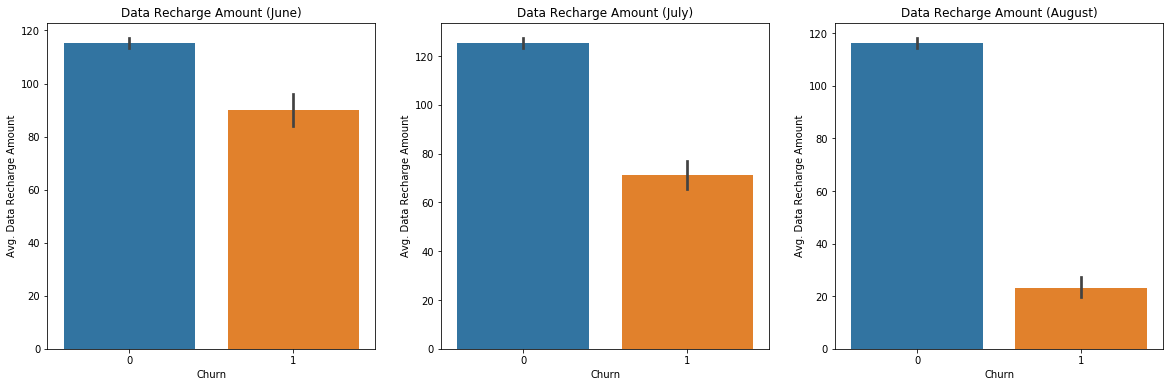

In [441]:
# Average Recharge Amount - Data
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Data Recharge Amount (June)")
sns.barplot(x = 'churn', y = 'av_rech_amt_data_6', data = highval_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Data Recharge Amount (July)")
sns.barplot(x = 'churn', y = 'av_rech_amt_data_7', data = highval_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Data Recharge Amount (August)")
sns.barplot(x = 'churn', y = 'av_rech_amt_data_8', data = highval_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')
plt.show()

## Insights:
1. The average data recharge amount is lower for churned customers than Non churned customers

In [442]:
# Fidning the total data recharge amount
highval_final["total_rech_amt_data_6"] = highval_final.total_rech_data_6*highval_final.av_rech_amt_data_6
highval_final["total_rech_amt_data_7"] = highval_final.total_rech_data_7*highval_final.av_rech_amt_data_7
highval_final["total_rech_amt_data_8"] = highval_final.total_rech_data_8*highval_final.av_rech_amt_data_8

In [443]:
# Creating a new feature for total data recharge amount during good phase
highval_final["total_rech_amt_data_goodphase"] = (highval_final.total_rech_amt_data_6 + highval_final.total_rech_amt_data_7)/2

# Creating a new feature for total data + calls recharge amount during good phase
highval_final["overall_rech_amt_goodphase"] = highval_final.total_rech_amt_goodphase + highval_final.total_rech_amt_data_goodphase

In [444]:
# Dropping the original columns for good phase

highval_final.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6',
                    'av_rech_amt_data_7','av_rech_amt_data_8'], axis=1, inplace=True)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Average Revenue Per User (June)')

Text(0, 0.5, 'Avg. Data Recharge Amount')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Average Revenue Per User (July)')

Text(0, 0.5, 'Avg. Revenue Per User')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Average Revenue Per User (August)')

Text(0, 0.5, 'Avg. Revenue Per User')

Text(0.5, 0, 'Churn')

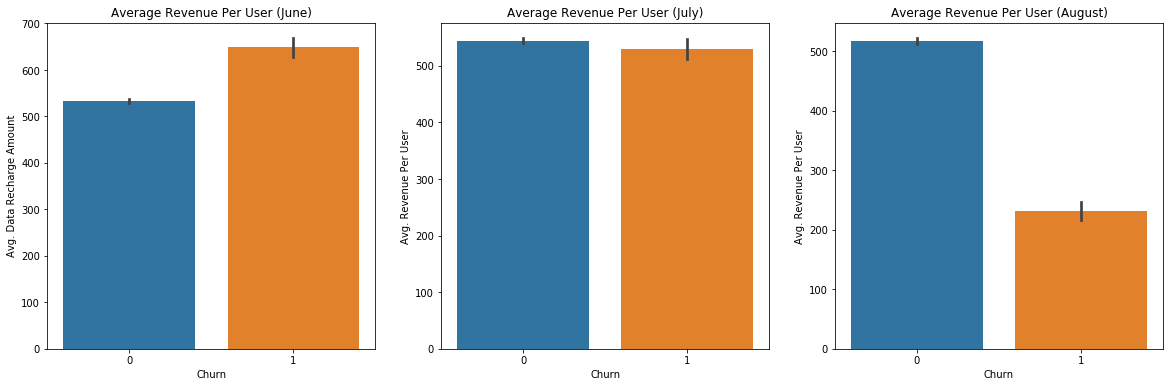

In [445]:
# ARPU - Average Revenue Per User

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Average Revenue Per User (June)")
sns.barplot(x = 'churn', y = 'arpu_6', data = highval_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Average Revenue Per User (July)")
sns.barplot(x = 'churn', y = 'arpu_7', data = highval_final)
plt.ylabel('Avg. Revenue Per User')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Average Revenue Per User (August)")
sns.barplot(x = 'churn', y = 'arpu_8', data = highval_final)
plt.ylabel('Avg. Revenue Per User')
plt.xlabel('Churn')
plt.show()

## Insights:
1. Churned customers have the highest drop in average revenue/user compared to non-churned customers between good and action phase

In [446]:
# Creating a new variable for Average Revenue Per User in good phase
highval_final["arpu_goodphase"] = (highval_final.arpu_6 + highval_final.arpu_7)/2

# Dropping the original columns for good phase                    
highval_final.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Maximum Recharge Amount (June)')

Text(0, 0.5, 'Avg. Maximum Recharge Amountt')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Maximum Recharge Amount (July)')

Text(0, 0.5, 'Avg. Maximum Recharge Amount')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Maximum Recharge Amount (August)')

Text(0, 0.5, 'Avg. Maximum Recharge Amount')

Text(0.5, 0, 'Churn')

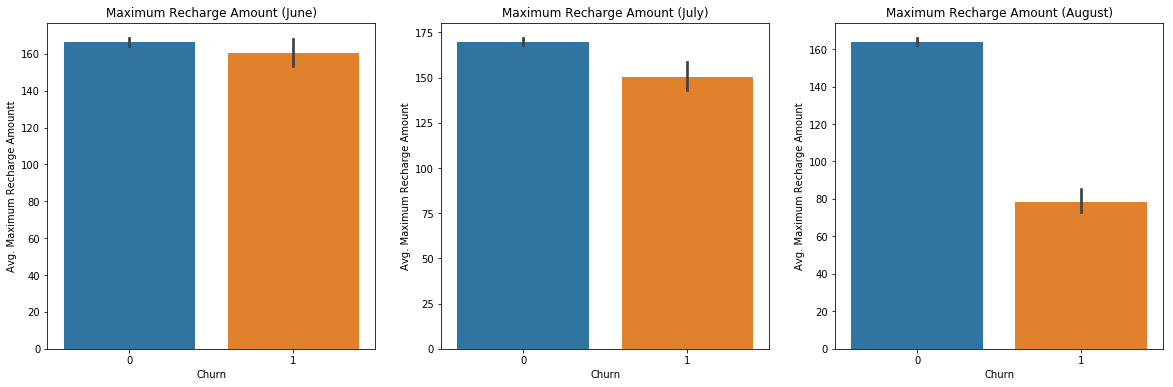

In [447]:
# Maximum Recharge Amount

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Maximum Recharge Amount (June)")
sns.barplot(x = 'churn', y = 'max_rech_amt_6', data = highval_final)
plt.ylabel('Avg. Maximum Recharge Amountt')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Maximum Recharge Amount (July)")
sns.barplot(x = 'churn', y = 'max_rech_amt_7', data = highval_final)
plt.ylabel('Avg. Maximum Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Maximum Recharge Amount (August)")
sns.barplot(x = 'churn', y = 'max_rech_amt_8', data = highval_final)
plt.ylabel('Avg. Maximum Recharge Amount')
plt.xlabel('Churn')


## Insights:
1. Churned customers have the highest drop in avg. max recharge amount compared to non-churned customers between good and action phase

In [448]:
# Creating a new variable for avg. max recharge amount in good phase
highval_final["max_rech_amt_calls_goodphase"] = (highval_final.max_rech_amt_6 + highval_final.max_rech_amt_7)/2

# Dropping the original columns for good phase                    
highval_final.drop(['max_rech_amt_6','max_rech_amt_7'], axis=1, inplace=True)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Last day recharge amount (June)')

Text(0, 0.5, 'Avg. Last day recharge amount')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Last day recharge amount (July)')

Text(0, 0.5, 'Avg. Last day recharge amountt')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Last day recharge amount (August)')

Text(0, 0.5, 'Avg. Last day recharge amount')

Text(0.5, 0, 'Churn')

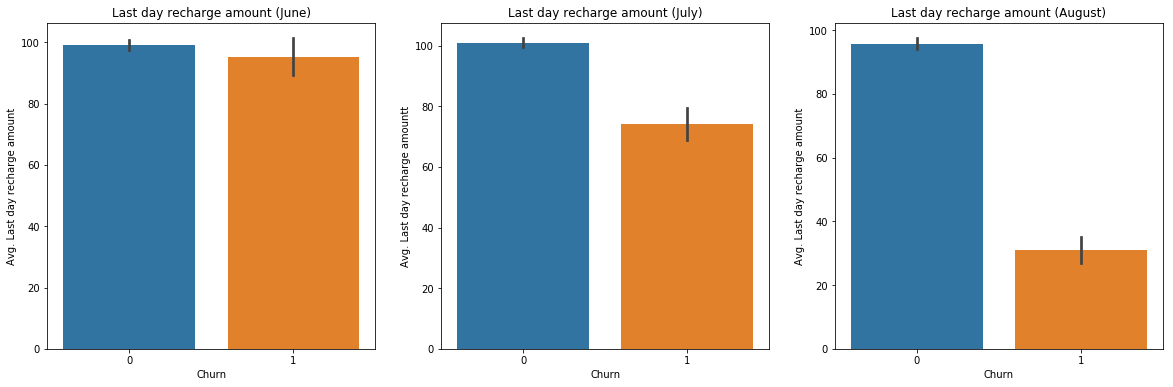

In [449]:
# last_day_rch_amt (rch = recharge, amt = amount)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Last day recharge amount (June)")
sns.barplot(x = 'churn', y = 'last_day_rch_amt_6', data = highval_final)
plt.ylabel('Avg. Last day recharge amount')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Last day recharge amount (July)")
sns.barplot(x = 'churn', y = 'last_day_rch_amt_7', data = highval_final)
plt.ylabel('Avg. Last day recharge amountt')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Last day recharge amount (August)")
sns.barplot(x = 'churn', y = 'last_day_rch_amt_8', data = highval_final)
plt.ylabel('Avg. Last day recharge amount')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Total Number of Recharges (June)')

Text(0, 0.5, 'Avg. Total Number of Recharges')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Total Number of Recharges (July)')

Text(0, 0.5, 'Avg. Total Number of Recharges')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Total Number of Recharges (August)')

Text(0, 0.5, 'Avg. Total Number of Recharges')

Text(0.5, 0, 'Churn')

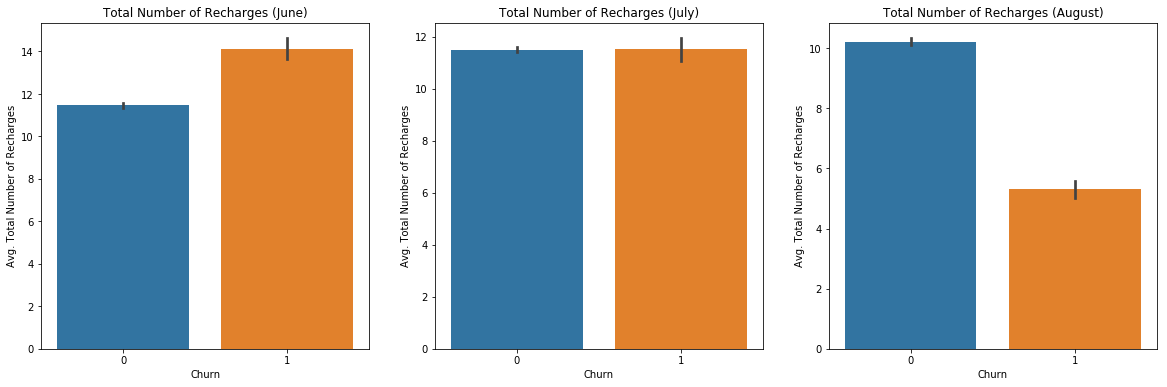

In [450]:
# total_rech_num
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Total Number of Recharges (June)")
sns.barplot(x = 'churn', y = 'total_rech_num_6', data = highval_final)
plt.ylabel('Avg. Total Number of Recharges')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Total Number of Recharges (July)")
sns.barplot(x = 'churn', y = 'total_rech_num_7', data = highval_final)
plt.ylabel('Avg. Total Number of Recharges')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Total Number of Recharges (August)")
sns.barplot(x = 'churn', y = 'total_rech_num_8', data = highval_final)
plt.ylabel('Avg. Total Number of Recharges')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Maximum data recharges (June)')

Text(0, 0.5, 'Avg. Maximum data recharges')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Maximum data recharges (July)')

Text(0, 0.5, 'Avg. Maximum data recharges')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Maximum data recharges (August)')

Text(0, 0.5, 'Avg. Maximum data recharges')

Text(0.5, 0, 'Churn')

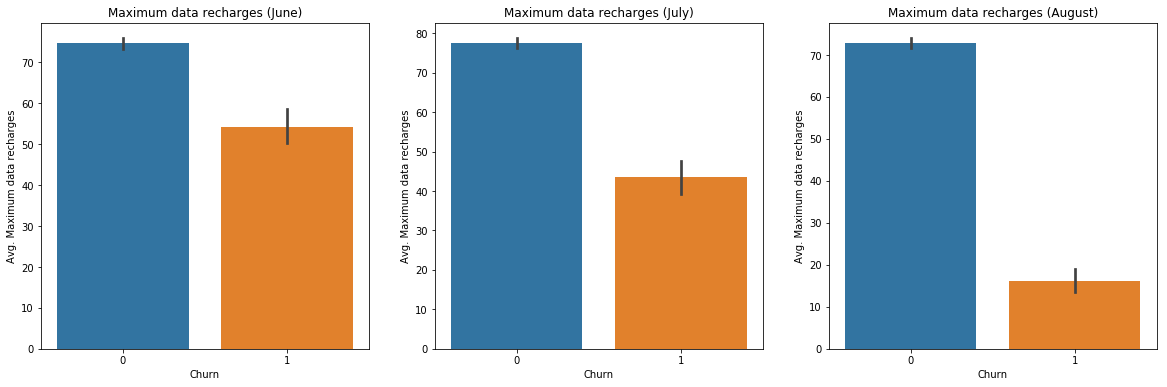

In [451]:
# max_rech_data

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Maximum data recharges (June)")
sns.barplot(x = 'churn', y = 'max_rech_data_6', data = highval_final)
plt.ylabel('Avg. Maximum data recharges')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Maximum data recharges (July)")
sns.barplot(x = 'churn', y = 'max_rech_data_7', data = highval_final)
plt.ylabel('Avg. Maximum data recharges')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Maximum data recharges (August)")
sns.barplot(x = 'churn', y = 'max_rech_data_8', data = highval_final)
plt.ylabel('Avg. Maximum data recharges')
plt.xlabel('Churn')
plt.show()

## Insights:
1. Churned customers have the highest drop in last day recharge amount, max recharge and total recharge values compared to non-churned customers between good and action phase

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, '2G volume (June)')

Text(0, 0.5, 'Avg. 2G volume')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, '2G volume (July)')

Text(0, 0.5, 'Avg. 2G volume')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, '2G volume (August)')

Text(0, 0.5, 'Avg. 2G volume')

Text(0.5, 0, 'Churn')

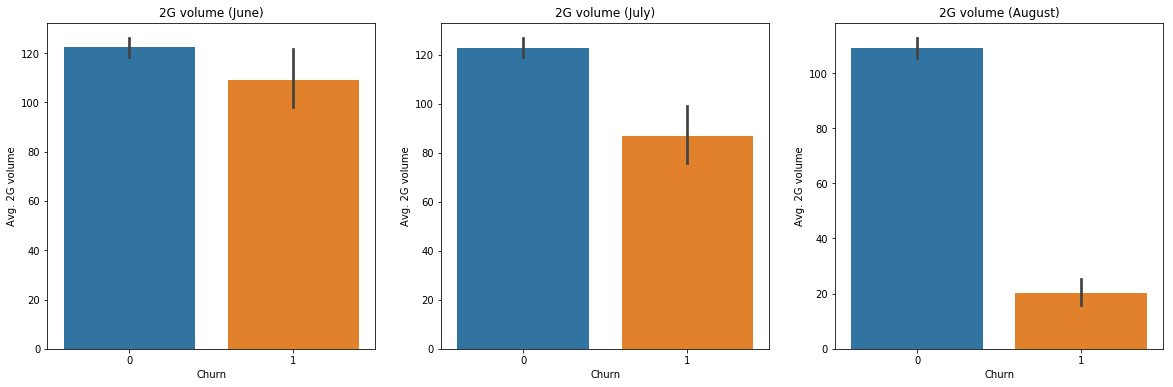

In [452]:
# vol_2g_mb

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("2G volume (June)")
sns.barplot(x = 'churn', y = 'vol_2g_mb_6', data = highval_final)
plt.ylabel('Avg. 2G volume')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("2G volume (July)")
sns.barplot(x = 'churn', y = 'vol_2g_mb_7', data = highval_final)
plt.ylabel('Avg. 2G volume')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("2G volume (August)")
sns.barplot(x = 'churn', y = 'vol_2g_mb_8', data = highval_final)
plt.ylabel('Avg. 2G volume')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Monthly 2G (June)')

Text(0, 0.5, 'Monthly 2G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Monthly 2G (July)')

Text(0, 0.5, 'Monthly 2G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Monthly 2G (August)')

Text(0, 0.5, 'Monthly 2G')

Text(0.5, 0, 'Churn')

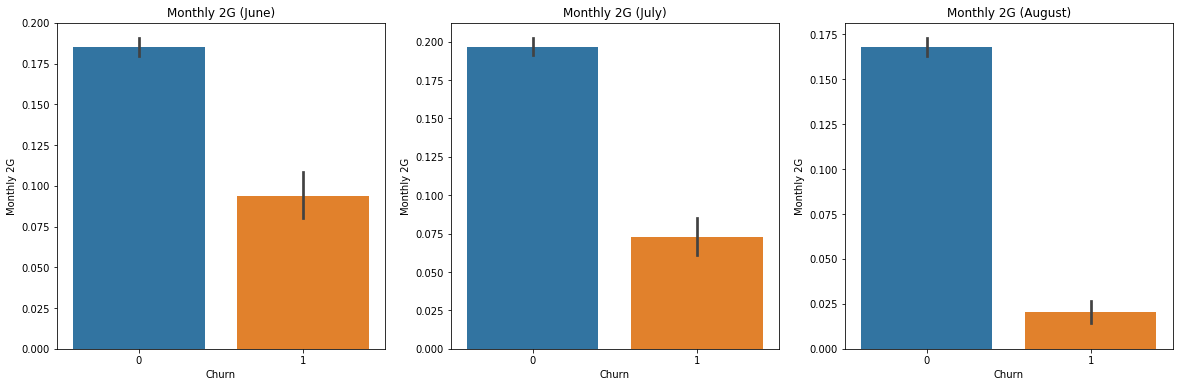

In [453]:
# monthly_2g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Monthly 2G (June)")
sns.barplot(x = 'churn', y = 'monthly_2g_6', data = highval_final)
plt.ylabel('Monthly 2G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Monthly 2G (July)")
sns.barplot(x = 'churn', y = 'monthly_2g_7', data = highval_final)
plt.ylabel('Monthly 2G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Monthly 2G (August)")
sns.barplot(x = 'churn', y = 'monthly_2g_8', data = highval_final)
plt.ylabel('Monthly 2G')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, '3G volume (June)')

Text(0, 0.5, 'Avg. 3G volume')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, '3G volume (July)')

Text(0, 0.5, 'Avg. 3G volume')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, '3G volume (August)')

Text(0, 0.5, 'Avg. 3G volume')

Text(0.5, 0, 'Churn')

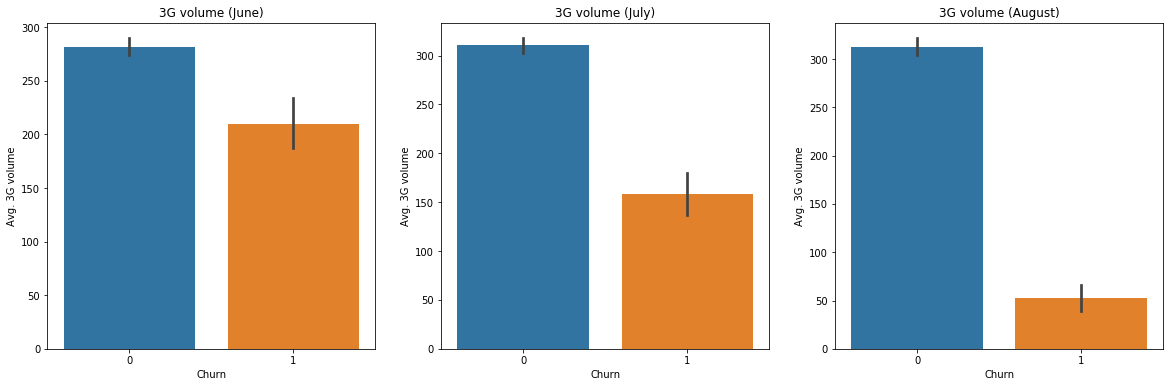

In [454]:
# vol_3g_mb

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("3G volume (June)")
sns.barplot(x = 'churn', y = 'vol_3g_mb_6', data = highval_final)
plt.ylabel('Avg. 3G volume')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("3G volume (July)")
sns.barplot(x = 'churn', y = 'vol_3g_mb_7', data = highval_final)
plt.ylabel('Avg. 3G volume')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("3G volume (August)")
sns.barplot(x = 'churn', y = 'vol_3g_mb_8', data = highval_final)
plt.ylabel('Avg. 3G volume')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Monthly 3G (June)')

Text(0, 0.5, 'Monthly 3G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Monthly 3G (July)')

Text(0, 0.5, 'Monthly 3G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Monthly 3G (August)')

Text(0, 0.5, 'Monthly 3G')

Text(0.5, 0, 'Churn')

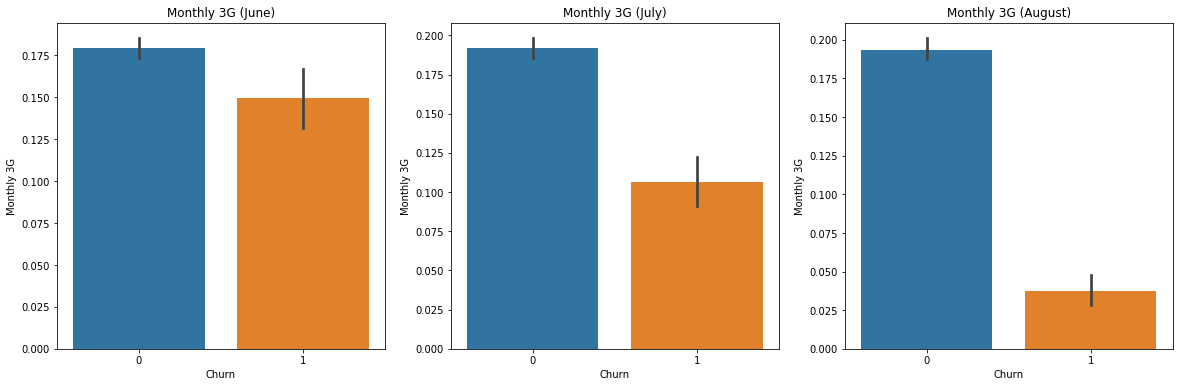

In [455]:
# monthly_3g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Monthly 3G (June)")
sns.barplot(x = 'churn', y = 'monthly_3g_6', data = highval_final)
plt.ylabel('Monthly 3G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Monthly 3G (July)")
sns.barplot(x = 'churn', y = 'monthly_3g_7', data = highval_final)
plt.ylabel('Monthly 3G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Monthly 3G (August)")
sns.barplot(x = 'churn', y = 'monthly_3g_8', data = highval_final)
plt.ylabel('Monthly 3G')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Night Pack (June)')

Text(0, 0.5, 'Night Pack')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Night Pack(July)')

Text(0, 0.5, 'Night Pack')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Night Pack (August)')

Text(0, 0.5, 'Night Pack')

Text(0.5, 0, 'Churn')

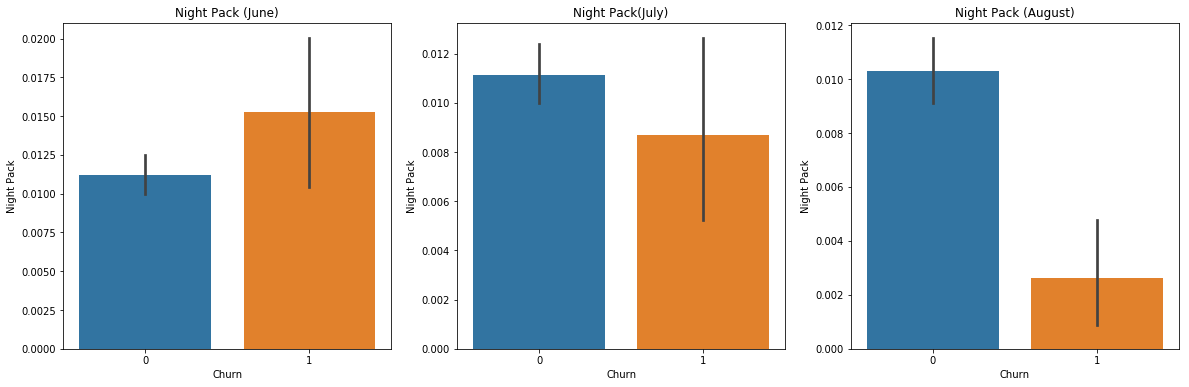

In [456]:
# night_pck_user

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Night Pack (June)")
sns.barplot(x = 'churn', y = 'night_pck_user_6', data = highval_final)
plt.ylabel('Night Pack')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Night Pack(July)")
sns.barplot(x = 'churn', y = 'night_pck_user_7', data = highval_final)
plt.ylabel('Night Pack')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Night Pack (August)")
sns.barplot(x = 'churn', y = 'night_pck_user_8', data = highval_final)
plt.ylabel('Night Pack')
plt.xlabel('Churn')
plt.show()

## Insights:
1. Different data packs have significant impact on churn rate between good and action phase

In [457]:
# Creating a new variable for monthly 2G and 3G
highval_final["monthly_2g_goodphase"] = (highval_final.monthly_2g_6 + highval_final.monthly_2g_7)/2
highval_final["monthly_3g_goodphase"] = (highval_final.monthly_3g_6 + highval_final.monthly_3g_7)/2

# Dropping the original columns for good phase
highval_final.drop(['monthly_2g_6','monthly_2g_7','monthly_3g_6','monthly_3g_7'], axis=1, inplace=True)

In [458]:
# Creating a new variable for 2G and 3G Volumes
highval_final["vol_2g_mb_goodphase"] = (highval_final.vol_2g_mb_6 + highval_final.vol_2g_mb_7)/2
highval_final["vol_3g_mb_goodphase"] = (highval_final.vol_3g_mb_6 + highval_final.vol_3g_mb_7)/2

# Dropping the original columns for good phase
highval_final.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7'], axis=1, inplace=True)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Sachet 2G (June)')

Text(0, 0.5, 'Sachet 2G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Sachet 2G (July)')

Text(0, 0.5, 'Sachet 2G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Sachet 2G (August)')

Text(0, 0.5, 'Sachet 2G')

Text(0.5, 0, 'Churn')

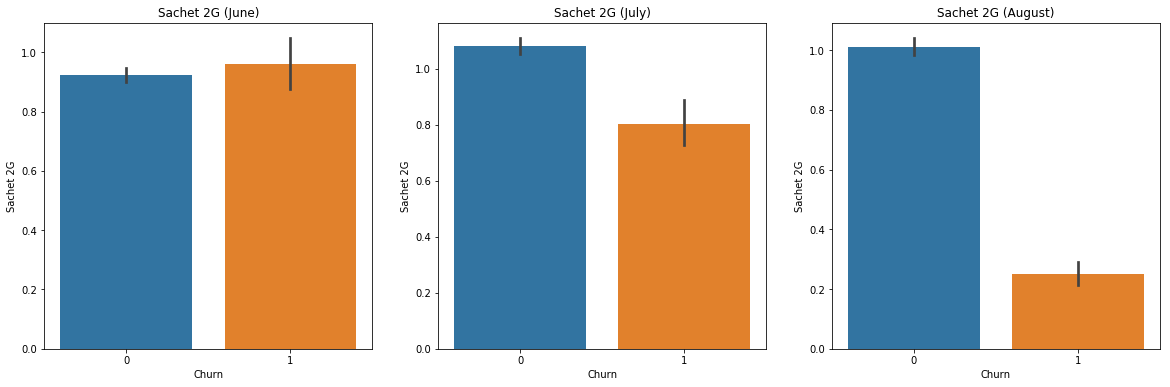

In [459]:
# sachet_2g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Sachet 2G (June)")
sns.barplot(x = 'churn', y = 'sachet_2g_6', data = highval_final)
plt.ylabel('Sachet 2G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Sachet 2G (July)")
sns.barplot(x = 'churn', y = 'sachet_2g_7', data = highval_final)
plt.ylabel('Sachet 2G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Sachet 2G (August)")
sns.barplot(x = 'churn', y = 'sachet_2g_8', data = highval_final)
plt.ylabel('Sachet 2G')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Sachet 3G (June)')

Text(0, 0.5, 'Sachet 3G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Sachet 3G (July)')

Text(0, 0.5, 'Sachet 3G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Sachet 3G (August)')

Text(0, 0.5, 'Sachet 3G')

Text(0.5, 0, 'Churn')

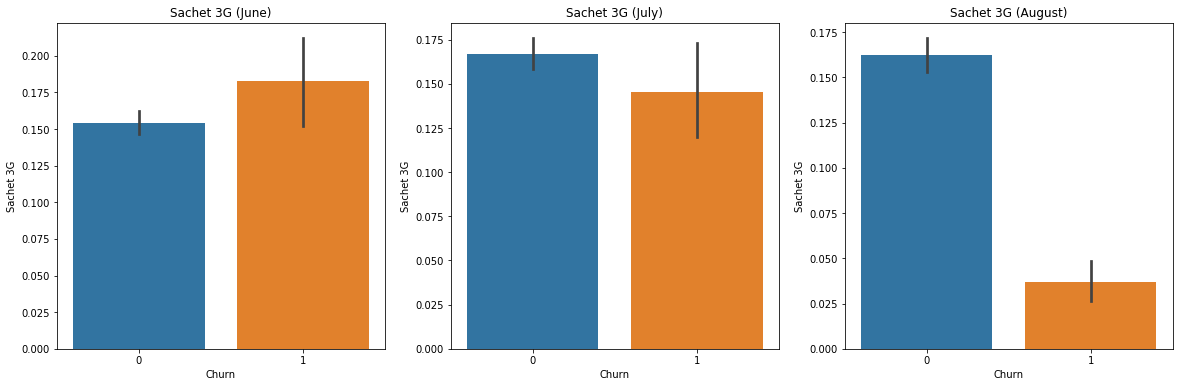

In [460]:
# sachet_3g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Sachet 3G (June)")
sns.barplot(x = 'churn', y = 'sachet_3g_6', data = highval_final)
plt.ylabel('Sachet 3G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Sachet 3G (July)")
sns.barplot(x = 'churn', y = 'sachet_3g_7', data = highval_final)
plt.ylabel('Sachet 3G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Sachet 3G (August)")
sns.barplot(x = 'churn', y = 'sachet_3g_8', data = highval_final)
plt.ylabel('Sachet 3G')
plt.xlabel('Churn')
plt.show()

In [461]:
# Creating a new variable for sachet 2G and 3G
highval_final["sachet_2g_goodphase"] = (highval_final.sachet_2g_6 + highval_final.sachet_2g_7)/2
highval_final["sachet_3g_goodphase"] = (highval_final.sachet_3g_6 + highval_final.sachet_3g_7)/2

# Dropping the original columns for good phase
highval_final.drop(['sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7'], axis=1, inplace=True)

In [462]:
# Volume based cost - when no specific scheme is not purchased and paid as per usage
# changing the Volume based cost column names same as others
highval_final.rename(columns= {'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8'}, inplace=True)
highval_final.drop('sep_vbc_3g', axis = 1, inplace=True)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Volume based cost (June)')

Text(0, 0.5, 'Volume based cost')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Volume based cost (July)')

Text(0, 0.5, 'Volume based cost')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Volume based cost (August)')

Text(0, 0.5, 'Volume based cost')

Text(0.5, 0, 'Churn')

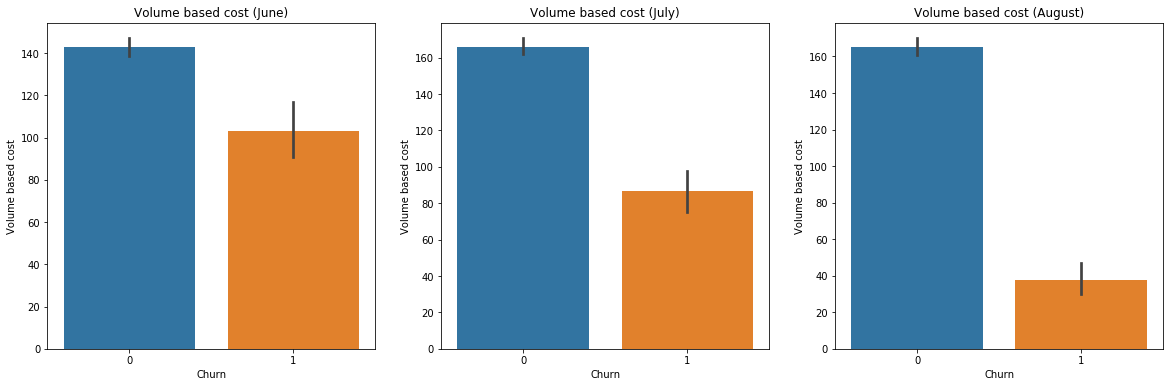

In [463]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Volume based cost (June)")
sns.barplot(x = 'churn', y = 'vbc_3g_6', data = highval_final)
plt.ylabel('Volume based cost')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Volume based cost (July)")
sns.barplot(x = 'churn', y = 'vbc_3g_7', data = highval_final)
plt.ylabel('Volume based cost')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Volume based cost (August)")
sns.barplot(x = 'churn', y = 'vbc_3g_8', data = highval_final)
plt.ylabel('Volume based cost')
plt.xlabel('Churn')
plt.show()

In [464]:
# Creating a new variable for VBC
highval_final["vbc_3g_goodphase"] = (highval_final.vbc_3g_6 + highval_final.vbc_3g_7)/2

# Dropping the original columns for good phase
highval_final.drop(['vbc_3g_6','vbc_3g_7'], axis=1, inplace=True)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'On Network (June)')

Text(0, 0.5, 'On Network')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'On Network (July)')

Text(0, 0.5, 'On Network')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'On Network (August)')

Text(0, 0.5, 'On Network')

Text(0.5, 0, 'Churn')

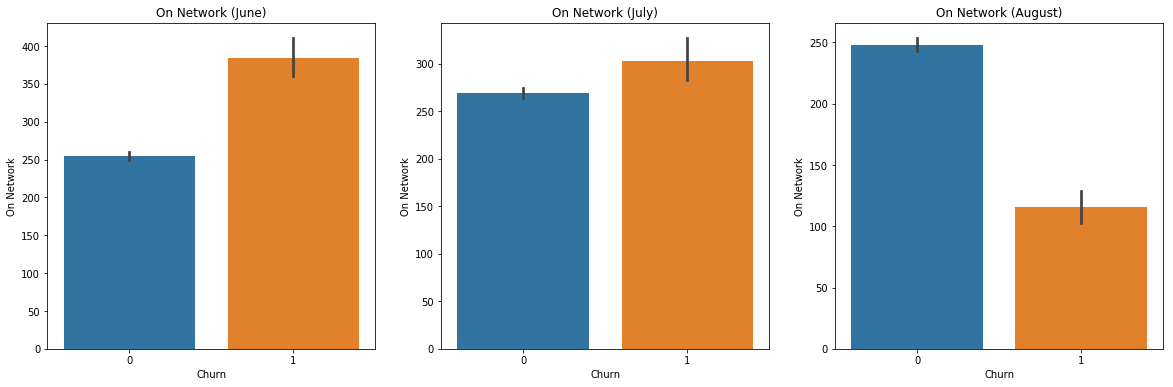

In [465]:
# All kind of calls within the same operator network - onnet

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("On Network (June)")
sns.barplot(x = 'churn', y = 'onnet_mou_6', data = highval_final)
plt.ylabel('On Network')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("On Network (July)")
sns.barplot(x = 'churn', y = 'onnet_mou_7', data = highval_final)
plt.ylabel('On Network')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("On Network (August)")
sns.barplot(x = 'churn', y = 'onnet_mou_8', data = highval_final)
plt.ylabel('On Network')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Off Network (June)')

Text(0, 0.5, 'Off Network')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Off Network (July)')

Text(0, 0.5, 'Off Network')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Off Network (August)')

Text(0, 0.5, 'Off Network')

Text(0.5, 0, 'Churn')

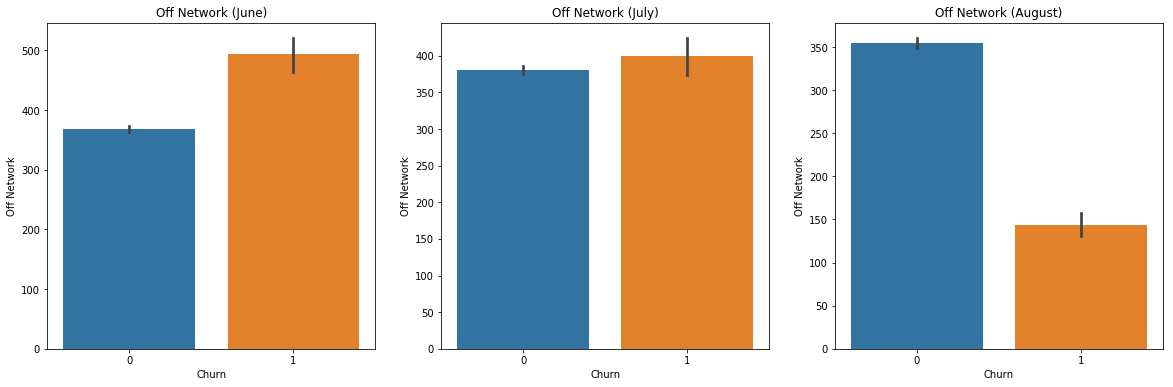

In [466]:
# All kind of calls outside the operator T network - offnet

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Off Network (June)")
sns.barplot(x = 'churn', y = 'offnet_mou_6', data = highval_final)
plt.ylabel('Off Network')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Off Network (July)")
sns.barplot(x = 'churn', y = 'offnet_mou_7', data = highval_final)
plt.ylabel('Off Network')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Off Network (August)")
sns.barplot(x = 'churn', y = 'offnet_mou_8', data = highval_final)
plt.ylabel('Off Network')
plt.xlabel('Churn')
plt.show()

## Insights:
1. Churned customers have the highest drop in VBC, sachet 2g/3g and onnet/offnet values compared to non-churned customers between good and action phase

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Roaming - Incoming MOU (June)')

Text(0, 0.5, 'Roaming - Incoming MOU')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Incoming MOU (July)')

Text(0, 0.5, 'Incoming MOU')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Roaming - Incoming MOU (August)')

Text(0, 0.5, 'Roaming - Incoming MOU')

Text(0.5, 0, 'Churn')

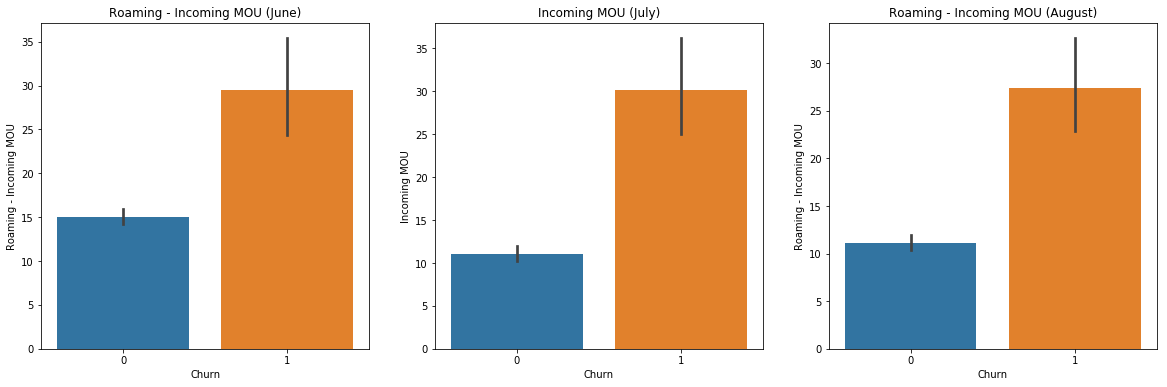

In [467]:
# Roaming Minutes of usage (voice calls) - Incoming calls

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Roaming - Incoming MOU (June)")
sns.barplot(x = 'churn', y = 'roam_ic_mou_6', data = highval_final)
plt.ylabel('Roaming - Incoming MOU')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Incoming MOU (July)")
sns.barplot(x = 'churn', y = 'roam_ic_mou_7', data = highval_final)
plt.ylabel('Incoming MOU')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Roaming - Incoming MOU (August)")
sns.barplot(x = 'churn', y = 'roam_ic_mou_8', data = highval_final)
plt.ylabel('Roaming - Incoming MOU')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Roaming - Outgoing MOU (June)')

Text(0, 0.5, 'Roaming - Outgoing MOU')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Outgoing MOU (July)')

Text(0, 0.5, 'Roaming - Outgoing MOU')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Roaming - Outgoing MOU (August)')

Text(0, 0.5, 'Roaming - Outgoing MOU')

Text(0.5, 0, 'Churn')

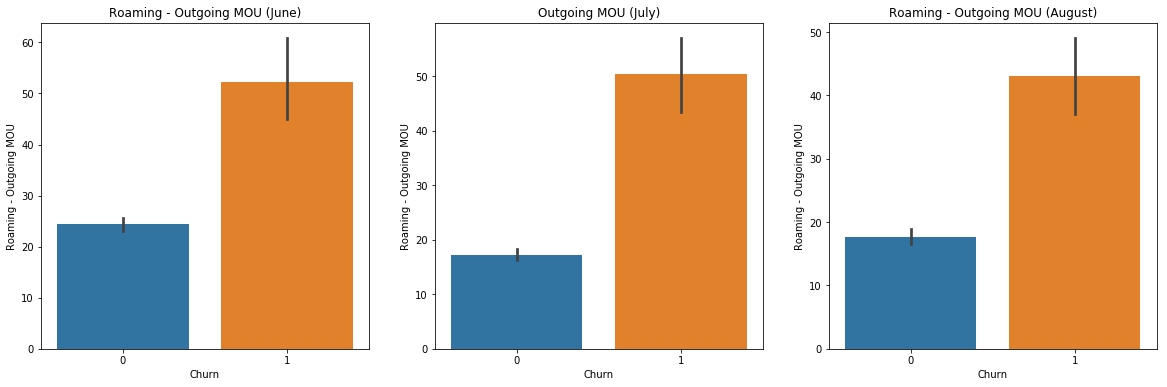

In [468]:
# # Roaming Minutes of usage (voice calls) - Outgoing calls

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Roaming - Outgoing MOU (June)")
sns.barplot(x = 'churn', y = 'roam_og_mou_6', data = highval_final)
plt.ylabel('Roaming - Outgoing MOU')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Outgoing MOU (July)")
sns.barplot(x = 'churn', y = 'roam_og_mou_7', data = highval_final)
plt.ylabel('Roaming - Outgoing MOU')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Roaming - Outgoing MOU (August)")
sns.barplot(x = 'churn', y = 'roam_og_mou_8', data = highval_final)
plt.ylabel('Roaming - Outgoing MOU')
plt.xlabel('Churn')
plt.show()

## Insights:
1. There is no much difference between good phase and action phase for churned customers w.r.t. roaming MOU

In [469]:
# Overall Incoming and Outgoing MOU
mou = highval_final.columns[highval_final.columns.str.contains('_mou')]
mou

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

## Insights:
 - According to the data dictionary/ buisness understanding below are the explanation for above parameters
1. T2T - Operator T to T, i.e. within same operator (mobile to mobile)
2. T2M - Operator T to other operator mobile
3. T2O - Operator T to other operator fixed line
4. T2F - Operator T to fixed lines of T
5. LOC - Local calls - within same telecom circle
6. STD - STD calls - outside the calling circle
7. IC - Incoming calls
8. OG - Outgoing calls
 - Also the total MOU is equal to the sum of individual MOU (t2t,t2f,t2m & t2O)
 - This can be verified for a June month data to confirm

In [470]:
# Quick check on incoming usage for june - Local
print("Incoming")
print(highval_final.loc_ic_mou_6.sum())
print(highval_final.loc_ic_t2t_mou_6.sum()+ highval_final.loc_ic_t2m_mou_6.sum()+highval_final.loc_ic_t2f_mou_6.sum())
# Quick check on outgoing usage for june - Local
print("Outgoing")
print(highval_final.loc_og_mou_6.sum())
print(highval_final.loc_og_t2t_mou_6.sum()+ highval_final.loc_og_t2m_mou_6.sum()+highval_final.loc_og_t2f_mou_6.sum())

Incoming
6723922.85
6723643.3
Outgoing
7396593.810000001
7396354.720000001


In [471]:
# Quick check on incoming usage for june - STD
print("Incoming")
print(highval_final.std_ic_mou_6.sum())
print(highval_final.std_ic_t2t_mou_6.sum()+ highval_final.std_ic_t2m_mou_6.sum()+highval_final.std_ic_t2f_mou_6.sum())
# Quick check on outgoing usage for june - STD
print("Outgoing")
print(highval_final.std_og_mou_6.sum())
print(highval_final.std_og_t2t_mou_6.sum()+ highval_final.std_og_t2m_mou_6.sum()+highval_final.std_og_t2f_mou_6.sum())

Incoming
1359899.5699999998
1359795.01
Outgoing
10177004.879999999
10176895.91


In [472]:
# Quick check on incoming usage for june - ISD
print("Incoming")
print(highval_final.total_ic_mou_6.sum())
print(highval_final.loc_ic_mou_6.sum()+ highval_final.std_ic_mou_6.sum()+highval_final.isd_ic_mou_6.sum()+
     +highval_final.spl_ic_mou_6.sum()
     +highval_final.ic_others_6.sum())
# # Quick check on outgoing usage for june - ISD
print("Outgoing")
print(highval_final.total_og_mou_6.sum())
print(highval_final.loc_og_mou_6.sum()+ highval_final.std_og_mou_6.sum()+highval_final.isd_og_mou_6.sum()+
     +highval_final.spl_og_mou_6.sum()
     +highval_final.og_others_6.sum())

Incoming
8420016.98
8419781.59
Outgoing
17799902.49
17799640.840000004


## Insights:
1. As above results look similar we can use the overall / total and ignore the individual components
2. Also new features can be derived from it

In [473]:
# Creating new features for incoming and outgoing MOU for good phase
# Local incoming
highval_final["loc_ic_t2f_mou_goodphase"] = (highval_final.loc_ic_t2f_mou_6 + highval_final.loc_ic_t2f_mou_7)/2
highval_final["loc_ic_t2m_mou_goodphase"] = (highval_final.loc_ic_t2m_mou_6 + highval_final.loc_ic_t2m_mou_7)/2
highval_final["loc_ic_t2t_mou_goodphase"] = (highval_final.loc_ic_t2t_mou_6 + highval_final.loc_ic_t2t_mou_7)/2

In [474]:
# STD incoming
highval_final["std_ic_t2f_mou_goodphase"] = (highval_final.std_ic_t2f_mou_6 + highval_final.std_ic_t2f_mou_7)/2
highval_final["std_ic_t2m_mou_goodphase"] = (highval_final.std_ic_t2m_mou_6 + highval_final.std_ic_t2m_mou_7)/2
highval_final["std_ic_t2o_mou_goodphase"] = (highval_final.std_ic_t2o_mou_6 + highval_final.std_ic_t2o_mou_7)/2
highval_final["std_ic_t2t_mou_goodphase"] = (highval_final.std_ic_t2t_mou_6 + highval_final.std_ic_t2t_mou_7)/2

# Other incoming
highval_final["isd_ic_mou_goodphase"] = (highval_final.isd_ic_mou_6 + highval_final.isd_ic_mou_7)/2
highval_final["spl_ic_mou_goodphase"] = (highval_final.spl_ic_mou_6 + highval_final.spl_ic_mou_7)/2
highval_final["ic_others_goodphase"] = (highval_final.ic_others_6 + highval_final.ic_others_7)/2
highval_final["roam_ic_mou_goodphase"] = (highval_final.roam_ic_mou_6 + highval_final.roam_ic_mou_7)/2

In [475]:
# Local outgoing
highval_final["loc_og_t2f_mou_goodphase"] = (highval_final.loc_og_t2f_mou_6 + highval_final.loc_og_t2f_mou_7)/2
highval_final["loc_og_t2m_mou_goodphase"] = (highval_final.loc_og_t2m_mou_6 + highval_final.loc_og_t2m_mou_7)/2
highval_final["loc_og_t2t_mou_goodphase"] = (highval_final.loc_og_t2t_mou_6 + highval_final.loc_og_t2t_mou_7)/2

In [476]:
# STD Outgoing
highval_final["std_og_t2f_mou_goodphase"] = (highval_final.std_og_t2f_mou_6 + highval_final.std_og_t2f_mou_7)/2
highval_final["std_og_t2m_mou_goodphase"] = (highval_final.std_og_t2m_mou_6 + highval_final.std_og_t2m_mou_7)/2
highval_final["std_og_t2t_mou_goodphase"] = (highval_final.std_og_t2t_mou_6 + highval_final.std_og_t2t_mou_7)/2
# Other Outgoing
highval_final["isd_og_mou_goodphase"] = (highval_final.isd_og_mou_6 + highval_final.isd_og_mou_7)/2
highval_final["spl_og_mou_goodphase"] = (highval_final.spl_og_mou_6 + highval_final.spl_og_mou_7)/2
highval_final["og_others_goodphase"] = (highval_final.og_others_6 + highval_final.og_others_7)/2
highval_final["roam_og_mou_goodphase"] = (highval_final.roam_og_mou_6 + highval_final.roam_og_mou_7)/2

In [477]:
# Dropping redundant columns
# Incoming
highval_final.drop(['loc_ic_t2f_mou_6','loc_ic_t2m_mou_6','loc_ic_t2t_mou_6','std_ic_t2f_mou_6',
                           'std_ic_t2m_mou_6','std_ic_t2o_mou_6','std_ic_t2t_mou_6','isd_ic_mou_6', 'spl_ic_mou_6',
                           'ic_others_6', 'roam_ic_mou_6','loc_ic_t2f_mou_7','loc_ic_t2m_mou_7','loc_ic_t2t_mou_7',
                           'std_ic_t2f_mou_7','std_ic_t2m_mou_7', 'std_ic_t2o_mou_7','std_ic_t2t_mou_7', 
                           'isd_ic_mou_7', 'spl_ic_mou_7', 'ic_others_7','roam_ic_mou_7'], inplace=True, axis=1)

In [478]:
# Outgoing
highval_final.drop(['loc_og_t2f_mou_6','loc_og_t2m_mou_6', 'loc_og_t2t_mou_6',
                           'std_og_t2f_mou_6','std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'isd_og_mou_6',
                           'spl_og_mou_6', 'og_others_6','roam_og_mou_6', 'loc_og_t2f_mou_7','loc_og_t2m_mou_7',
                           'loc_og_t2t_mou_7','std_og_t2f_mou_7','std_og_t2m_mou_7','std_og_t2t_mou_7',
                           'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'roam_og_mou_7'], inplace=True, axis=1)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Revenue Per User 2G (June)')

Text(0, 0.5, 'Revenue Per User 2G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Revenue Per User 2G (July)')

Text(0, 0.5, 'Revenue Per User 2G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Revenue Per User 2G (August)')

Text(0, 0.5, 'Revenue Per User 2G')

Text(0.5, 0, 'Churn')

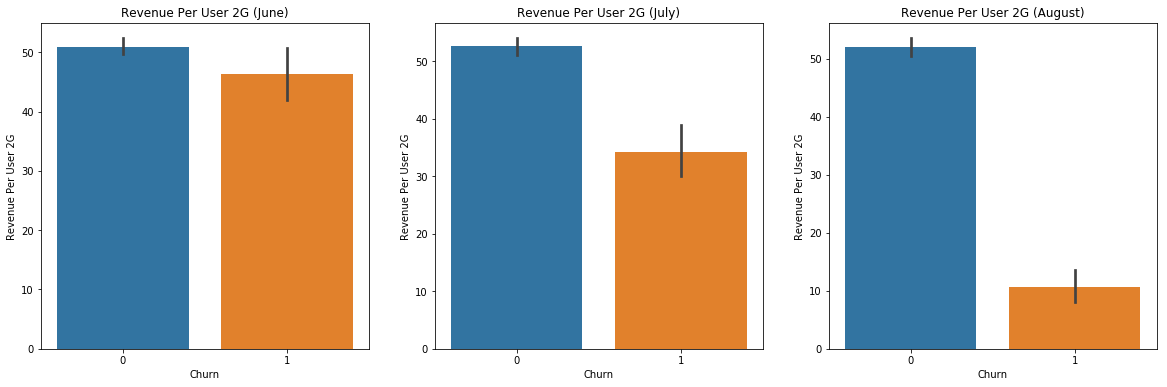

In [479]:
# RPU - Revenue Per User 2G

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Revenue Per User 2G (June)")
sns.barplot(x = 'churn', y = 'arpu_2g_6', data = highval_final)
plt.ylabel('Revenue Per User 2G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Revenue Per User 2G (July)")
sns.barplot(x = 'churn', y = 'arpu_2g_7', data = highval_final)
plt.ylabel('Revenue Per User 2G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Revenue Per User 2G (August)")
sns.barplot(x = 'churn', y = 'arpu_2g_8', data = highval_final)
plt.ylabel('Revenue Per User 2G')
plt.xlabel('Churn')
plt.show()

<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Revenue Per User 3G (June)')

Text(0, 0.5, 'Revenue Per User 3G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Revenue Per User 3G (July)')

Text(0, 0.5, 'Revenue Per User 3G')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Revenue Per User 3G (August)')

Text(0, 0.5, 'Revenue Per User 3G')

Text(0.5, 0, 'Churn')

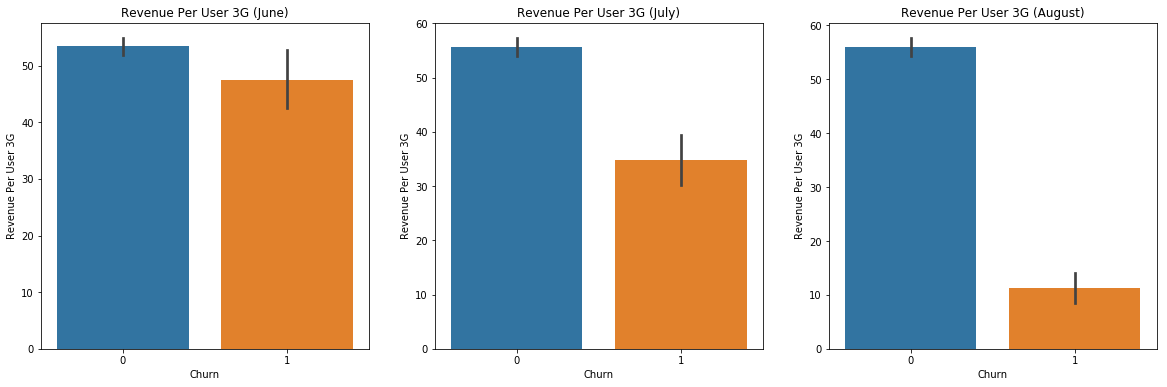

In [480]:
# RPU - Revenue Per User 3G

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Revenue Per User 3G (June)")
sns.barplot(x = 'churn', y = 'arpu_3g_6', data = highval_final)
plt.ylabel('Revenue Per User 3G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Revenue Per User 3G (July)")
sns.barplot(x = 'churn', y = 'arpu_3g_7', data = highval_final)
plt.ylabel('Revenue Per User 3G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Revenue Per User 3G (August)")
sns.barplot(x = 'churn', y = 'arpu_3g_8', data = highval_final)
plt.ylabel('Revenue Per User 3G')
plt.xlabel('Churn')
plt.show()

In [481]:
highval_final.shape

(28788, 140)

In [482]:
highval_final.to_csv("highvalue_final.csv")

<Figure size 1440x864 with 0 Axes>

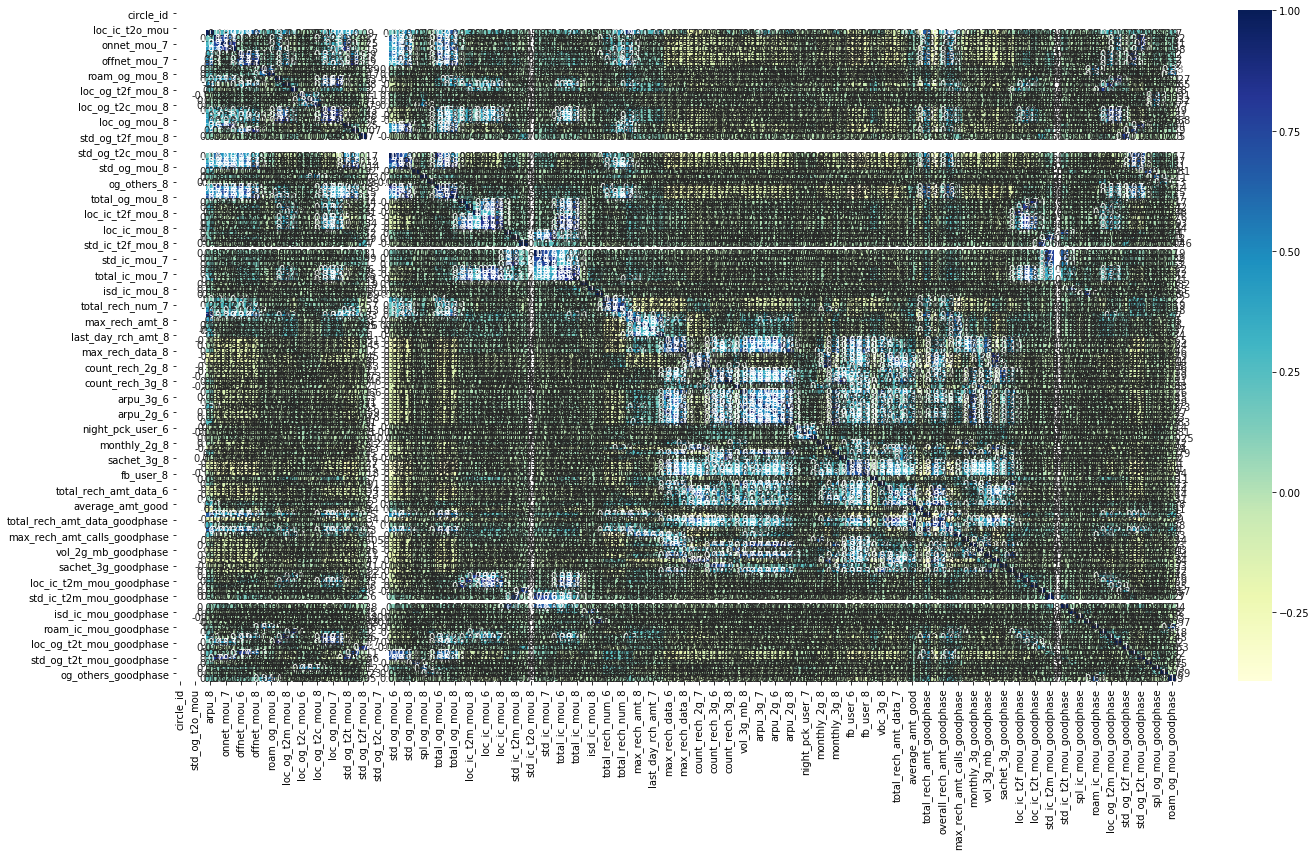

In [483]:
# Correlation Matrix / Heat map
plt.figure(figsize=(20,12))
cor = highval_final.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

In [484]:
# Dropping date columns & circle id as it will nit be needed for modelling and also we have other new features

highval_final.drop(['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8','date_of_last_rech_6',
                    'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
                    'date_of_last_rech_data_8'], axis=1, inplace=True)
highval_final.drop('circle_id', axis = 1, inplace = True)
highval_final.shape

(28788, 130)

<Figure size 1440x864 with 0 Axes>

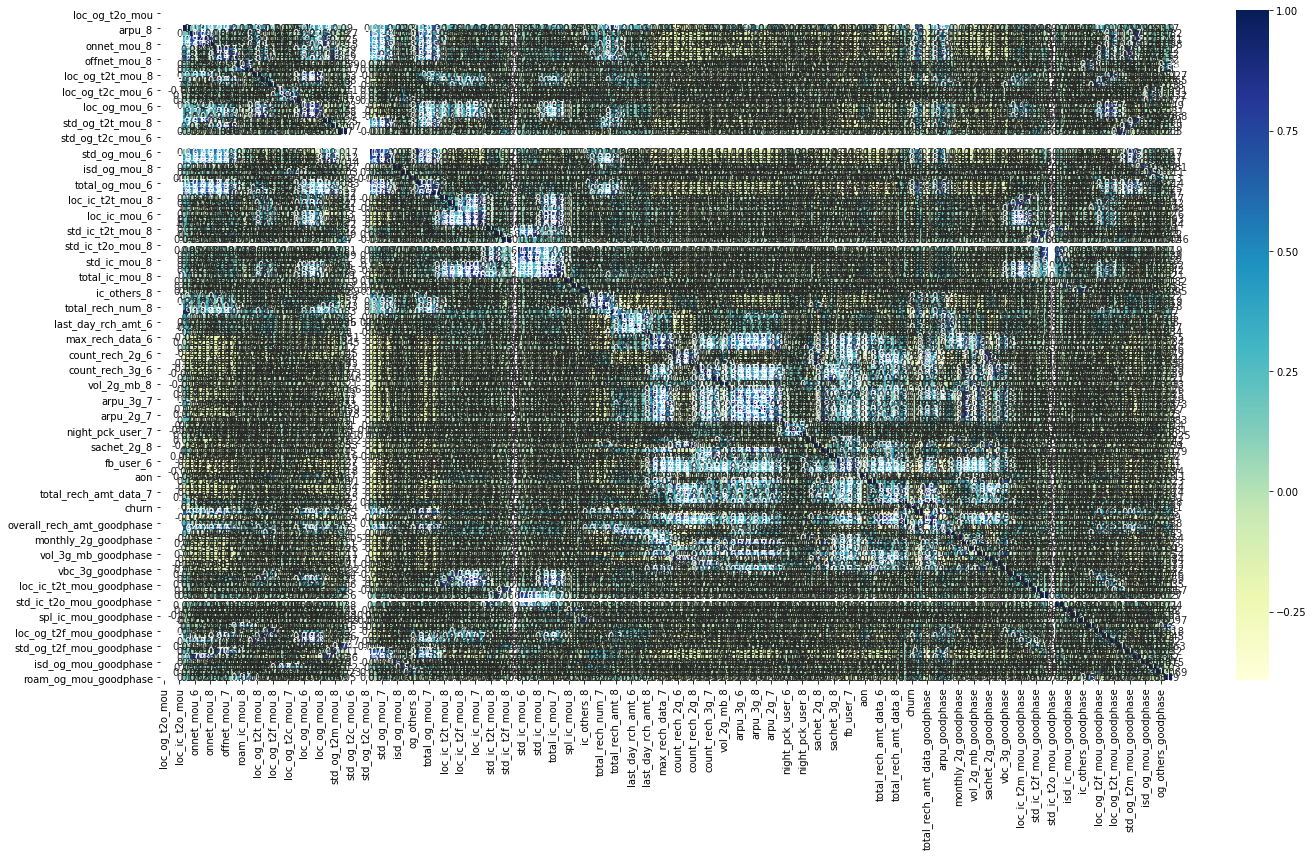

In [485]:
# Correlation Matrix / Heat map
plt.figure(figsize=(20,12))
cor = highval_final.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

# Modelling

Below steps will be followed to build a model tp predict the customer who will churn
1. Train Test Split
2. Handling Imbalanced dataset - Synthetic Minority Over-sampling Technique has been designed to generate new samples that are coherent with the minor class distribution.
   - Reference 1: https://towardsdatascience.com/comparing-different-classification-machine-learning-models-for-an-imbalanced-dataset-fdae1af3677f
   - Reference 2: https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
3. Scaling using StandardScaler
4. Dimentionality reduction using PCA
5. Train a variety of models - Logistic and Random Forest
6. Hyper parameter tuning
7. Evaluate the models using appropriate evaluation metrics - Accuracy, Precision and Recall
8. Model selection based on metrics

## Train Test Split

In [486]:
# Response variable
y = highval_final['churn']
# Feature variable
x = highval_final.drop('churn', axis=1)

In [487]:
# Split the data between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 10)

## Handling Imbalanced dataset - Synthetic Minority Over-sampling Technique

In [488]:
# This is performed only on train data set as balancing is needed whie training the model
#check churn ratio before balacing using smote
print('Churn % before balancing')
(100 * y_train.value_counts()/ y_train.shape[0]).round(2)

Churn % before balancing


0    91.89
1     8.11
Name: churn, dtype: float64

In [489]:
# Balancing
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)

In [490]:
#check churn ratio after balacing using smote
print('Churn % after balancing')
print((y_train != 0).sum()/(y_train == 0).sum())

Churn % after balancing
1.0


## Insights:
1. SMOTE has balanced out the data well

## Scaling using StandardScaler

In [491]:
# Scale variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Dimentionality reduction using PCA (Principle Component Analysis)

PCA is a linear dimensionality reduction technique. It helps in getting the most important variables from a larger set of variables. It also handles the problem of multi collinearity

In [492]:
#Perform PCA
pca = PCA(svd_solver = 'randomized', random_state = 10)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='randomized', tol=0.0, whiten=False)

In [493]:
pca.components_

array([[ 4.64207868e-17,  1.11022302e-16, -0.00000000e+00, ...,
        -3.89649093e-02, -1.90627022e-02, -2.89118703e-02],
       [ 8.55430830e-17, -1.11022302e-16, -1.11022302e-16, ...,
         2.54191496e-02,  1.73440218e-02,  4.88625182e-03],
       [ 8.23982868e-18,  1.38777878e-17, -5.55111512e-17, ...,
        -5.60748269e-02, -1.15550840e-02, -4.32856132e-02],
       ...,
       [-0.00000000e+00,  1.89413053e-01, -1.46464251e-01, ...,
         5.02549391e-15,  8.75167994e-16,  9.54097912e-16],
       [-0.00000000e+00,  2.31776278e-06,  1.44862360e-05, ...,
         1.36462302e-18,  2.82432548e-19,  3.16578564e-20],
       [ 9.99999544e-01, -4.32932516e-08,  2.19346259e-07, ...,
        -1.09184336e-14, -2.90717643e-15,  6.54572797e-17]])

In [494]:
# Checking the first 20 principal components
pca.explained_variance_ratio_[0:20]

array([0.11937336, 0.1046481 , 0.06227804, 0.05293866, 0.03794919,
       0.03446361, 0.03131573, 0.0278053 , 0.02444176, 0.0235203 ,
       0.02226516, 0.02101457, 0.01997496, 0.01758876, 0.0169714 ,
       0.0165123 , 0.01580747, 0.01538115, 0.01400658, 0.01347292])

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

Text(0.5, 1.0, 'Cumulative Proportion of Variance Explained by PC')

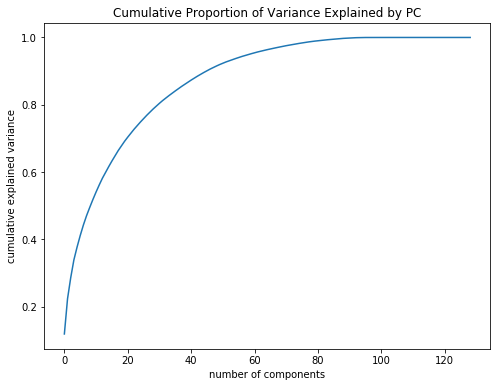

In [495]:
#Making the screeplot

fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Proportion of Variance Explained by PC')
plt.show()


In [496]:
pcax_explains_variance = {'PC-10':round(pca.explained_variance_ratio_[0:10].sum(),2), 
                               'PC-20':round(pca.explained_variance_ratio_[0:20].sum(),2),
                               'PC-30':round(pca.explained_variance_ratio_[0:30].sum(),2), 
                               'PC-40':round(pca.explained_variance_ratio_[0:40].sum(),2),
                               'PC-50':round(pca.explained_variance_ratio_[0:50].sum(),2),
                               'PC-60':round(pca.explained_variance_ratio_[0:60].sum(),2),
                               'PC-70':round(pca.explained_variance_ratio_[0:70].sum(),2),
                               'PC-80':round(pca.explained_variance_ratio_[0:80].sum(),2),
                               'PC-90':round(pca.explained_variance_ratio_[0:90].sum(),2)}
pcax_explains_variance

{'PC-10': 0.52,
 'PC-20': 0.69,
 'PC-30': 0.8,
 'PC-40': 0.87,
 'PC-50': 0.92,
 'PC-60': 0.95,
 'PC-70': 0.97,
 'PC-80': 0.99,
 'PC-90': 1.0}

## Insights:
1. First 10 principal components explains 52% of the variance while 92% by first 50 principal components
2. From scree plot it is clear that the cumulative variance explanation curve flattens after 50.

In [497]:
#Visualizing the principal components

pcs_df = pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1]})

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

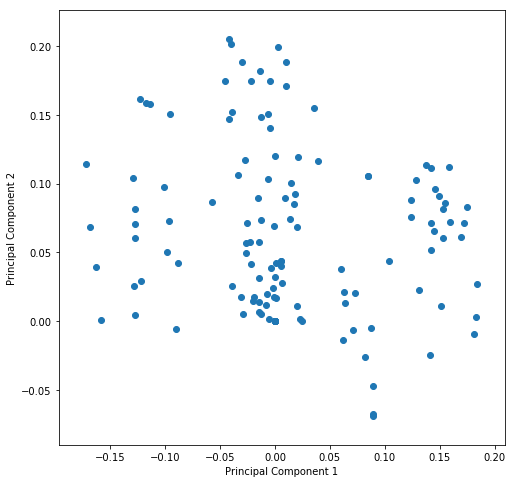

In [498]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [499]:
# Fitting the PCA
pca_final = IncrementalPCA(n_components = 50)

In [500]:
df_train_pca = pca_final.fit_transform(x_train)

In [501]:
# Checking multicollinearity - if there is correlation between PC's
corrmat = np.round(np.corrcoef(df_train_pca.transpose()),2)

<Figure size 1440x1440 with 0 Axes>

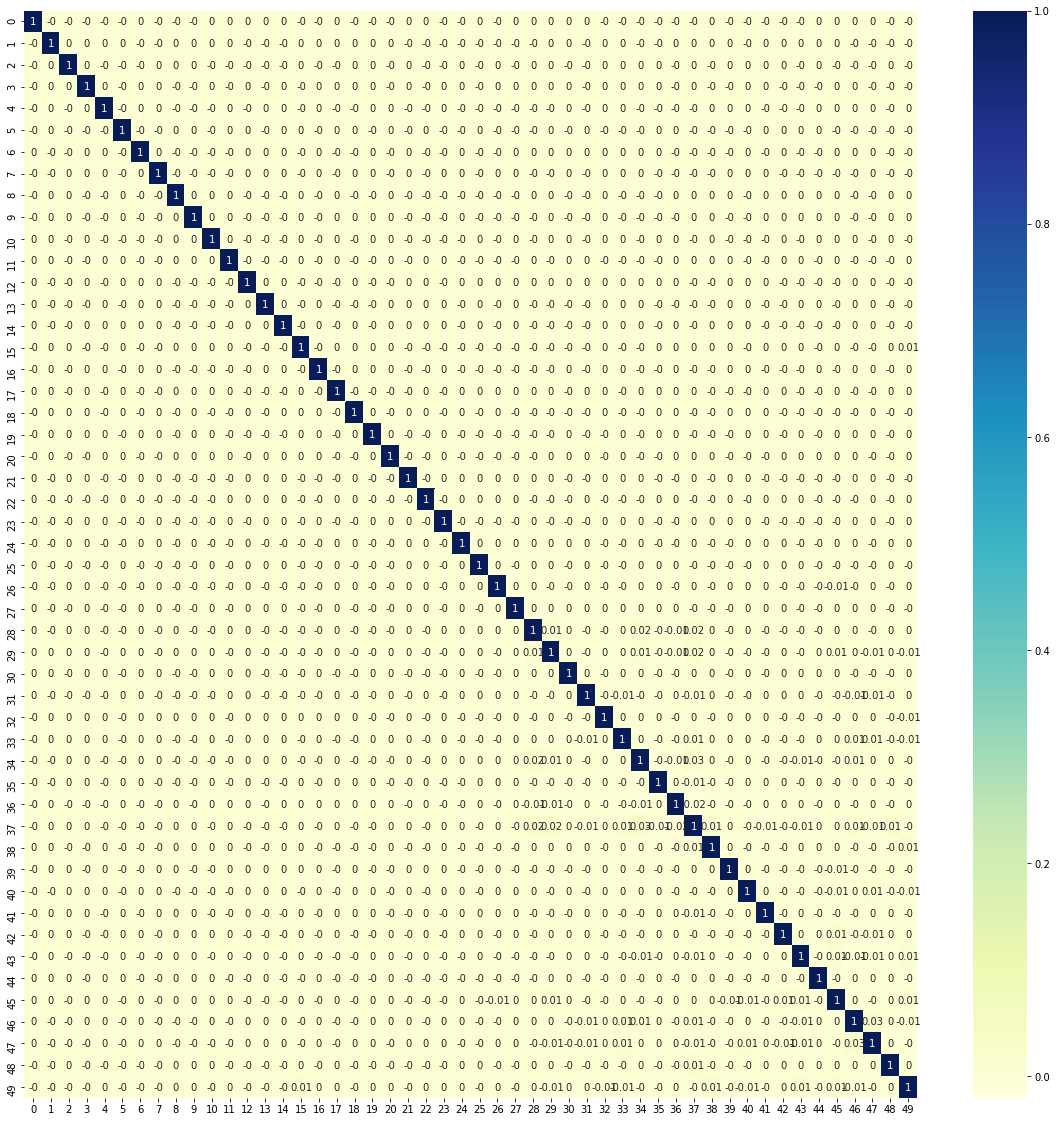

In [502]:
# Plot the correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(corrmat, annot= True, cmap="YlGnBu")


## Insights:
1. From the heat map it is clear that there is nu sigficant correlation between the principal components
2. Hence there is no multi collinearity problem here for PC's

In [503]:
# Applying the PC's on test data
df_test_pca = pca_final.transform(x_test)

# Train a variety of models

1. There are numerious ML models available in industry which are robust
2. Here we will go with Logistic Regression and Random Forest. The reason for chossing this is based on the problem statemtement and business need mentioned
  - Identify important variables that are strong predictors of churn
  - Predict whether a high-value customer will churn or not, in near future

In [504]:
# Logistic Regression
LR_with_PCA = LogisticRegression(random_state=10)
C=list(np.power(10.0, np.arange(-4, 4)))
n_folds = 5
gs = GridSearchCV(LR_with_PCA,
    param_grid=[{'C': C, 'penalty': ['l1', 'l2']}],
    cv= n_folds,                 
    scoring='accuracy',
    n_jobs= 1,
    verbose=1,
    refit=True,
    return_train_score = True)

In [505]:
# Fittng the Model
LR_with_PCA_model = gs.fit(df_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   25.7s finished


In [506]:
# cv results
cv_results = pd.DataFrame(LR_with_PCA_model.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [507]:
# Getting the important columns out
cv_results_important = cv_results[['param_C', 'param_penalty',
                                   'mean_train_score','std_train_score',
                                   'mean_test_score','std_test_score',
                                   'rank_test_score']]
cv_results_important.sort_values('rank_test_score').head()

param_C param_penalty  mean_train_score  std_train_score  mean_test_score  \
11      10            l2          0.842989         0.001097         0.842334   
12     100            l1          0.843002         0.001091         0.842334   
13     100            l2          0.842982         0.001102         0.842334   
14    1000            l1          0.842996         0.001096         0.842334   
15    1000            l2          0.842982         0.001102         0.842334   

    std_test_score  rank_test_score  
11        0.002984                1  
12        0.002984                1  
13        0.002984                1  
14        0.002984                1  
15        0.002984                1

## Insights:
1. Logisttic regression model is simple and easy to execute
2. 'C' parameter is inverse of regularization strength. It does well for both l1 and l2 regularisations
3. Results suggests all features have importance as PCA was already performed

 - Reference 1 : https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
 - Reference 2: https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul


In [508]:
cv_results_l1 = cv_results[cv_results_important['param_penalty'] == 'l1']
cv_results_l2 = cv_results[cv_results_important['param_penalty'] == 'l2']

<Figure size 576x576 with 0 Axes>

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'L1 regularization')

(0.84, 0.85)

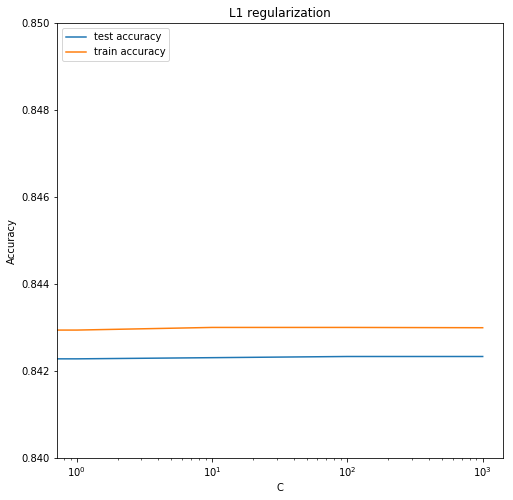

In [509]:
cv_results_l1['param_C'] = cv_results_l1['param_C'].astype('int')

plt.figure(figsize=(8,8))
l1 = cv_results_l1
plt.plot(l1["param_C"], l1["mean_test_score"])
plt.plot(l1["param_C"], l1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("L1 regularization")
plt.ylim([0.84, 0.85])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

<Figure size 576x576 with 0 Axes>

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'L2 regularization')

(0.81, 0.85)

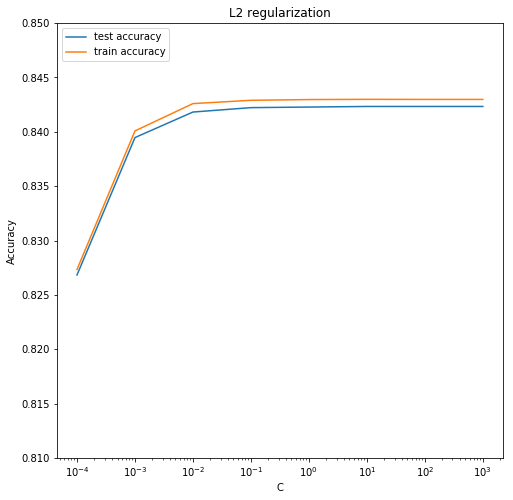

In [510]:
plt.figure(figsize=(8,8))
l2 = cv_results_l2

plt.plot(l2["param_C"], l2["mean_test_score"])
plt.plot(l2["param_C"], l2["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("L2 regularization")
plt.ylim([0.81, 0.85])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

## Insigths:
1. There is no impact of model performance by L1 Regularization
2. There is significant impact on performance by L2 Regularisation
3. Considering the model accuracy for test data set, the accuracy is high at c=1
4. L2 regularisation can be used with c =1

In [511]:
## Optimal scores
opt_score = LR_with_PCA_model.best_score_
opt_score.round(4)

0.8423

In [512]:
# Optimal params
opt_hyperparams = LR_with_PCA_model.best_params_
opt_hyperparams

{'C': 10.0, 'penalty': 'l2'}

In [513]:
# Fitting the model with best hyper parameters
# specifying optimal hyperparameters

# Optimal Model
LR = LogisticRegression(penalty = 'l2', C = 1.0, random_state=10)
LR_PCA_final = LR.fit(df_train_pca, y_train)

In [514]:
# Train and Test Accuracy
predict_prob_train = LR_PCA_final.predict_proba(df_train_pca)[:,1]
predict_prob_test = LR_PCA_final.predict_proba(df_test_pca)[:,1]

In [515]:
print("Train Data Accurancy = ",round(100*metrics.roc_auc_score(y_train, predict_prob_train),4))
print("Test Data Accurancy = ",round(100*metrics.roc_auc_score(y_test, predict_prob_test),4))

Train Data Accurancy =  91.1972
Test Data Accurancy =  88.9299


In [516]:
# Creating data frame with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_prob':predict_prob_train})

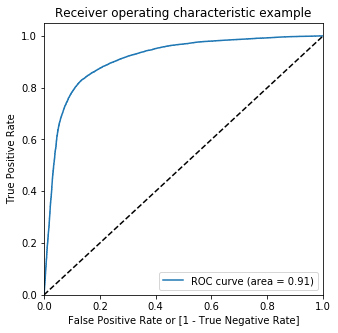

In [517]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

## Insights:
1. The train and test data accuracy score is bit different
1. At P = 0.6 the model is stabilizing and hence the cut off value as 0.6

In [518]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range (10)]
for i in numbers: 
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

Churn  Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.015414    1    0    0    0    0    0    0    0    0    0
1      0    0.136555    1    1    0    0    0    0    0    0    0    0
2      0    0.076845    1    0    0    0    0    0    0    0    0    0
3      0    0.101409    1    1    0    0    0    0    0    0    0    0
4      0    0.131108    1    1    0    0    0    0    0    0    0    0

In [519]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.709294     0.977048     0.441540
0.2   0.2  0.773127     0.953286     0.592969
0.3   0.3  0.806907     0.925204     0.688610
0.4   0.4  0.829643     0.893773     0.765513
0.5   0.5  0.842901     0.858562     0.827240
0.6   0.6  0.846762     0.816601     0.876924
0.7   0.7  0.833477     0.751634     0.915321
0.8   0.8  0.796808     0.645083     0.948534
0.9   0.9  0.640060     0.299887     0.980234


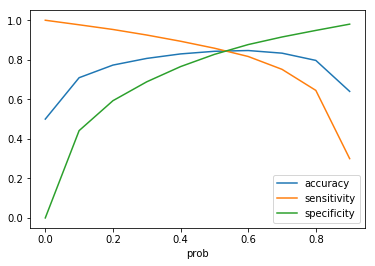

In [520]:
# Curve
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

## Insights:
1. From ROC curve the optimal probability range is between 0.5 to 0.65
2. Accuracy, specificity and sensitivity curve converge at o.55
3. Hence we can take p = 0.55 for further predictions

In [521]:
y_train_pred_final['Final_Predict'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>=0.55 else 0)

In [522]:
# Final DataFrame
finfr = list(y_train_pred_final.columns)
y_train_pred_final.drop(finfr[2:-1],axis = 1, inplace = True)
y_train_pred_final.head()

Churn  Churn_prob  Final_Predict
0      0    0.015414              0
1      0    0.136555              0
2      0    0.076845              0
3      0    0.101409              0
4      0    0.131108              0

In [523]:
#### Metrics
Precision_sklearn = round(100*precision_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict),4)
Recall_sklearn = round(100*recall_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict),4)
Accuracy_sklearn = accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Final_Predict)

print('Accuracy_sklearn',Precision_sklearn)
print('Precision_sklearn',Precision_sklearn)
print('Recall_sklearn',Recall_sklearn)

Accuracy_sklearn 85.092
Precision_sklearn 85.092
Recall_sklearn 83.8743


In [524]:
con_mat2 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Final_Predict)
con_mat2
TP = con_mat2[1,1] # true positive 
TN = con_mat2[0,0] # true negatives
FP = con_mat2[0,1] # false positives
FN = con_mat2[1,0] # false negatives

array([[15796,  2721],
       [ 2986, 15531]], dtype=int64)

In [525]:
# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)

# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [526]:
Metrics_train = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

Metrics_train

{'Accuracy': 84.6, 'Precision': 85.0, 'Recall': 83.9}

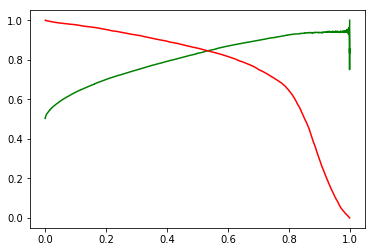

In [527]:
# Precision recall curve

p,r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Insights:
1. Recall and precision curve converge at 0.55
2. Since the goal is to predict as many true churns possible we can go with Recall values
3. This ensures there is lower false negatives and higher true positives

In [528]:
# Model performance on test data
df_test_pca[0:1]

array([[ 1.65811166e+00,  4.59246994e+00, -9.07777087e-01,
         9.60265999e-01, -1.07249032e+00,  1.63731623e+00,
        -8.42247224e-01, -2.23108507e+00, -3.37741505e+00,
         1.58650549e+00, -2.71284621e+00, -1.34950565e+00,
         2.04545963e+00, -1.33120113e+00,  3.39492478e+00,
         4.80839562e-01, -3.97312093e-01,  2.11059625e-01,
         9.85070761e-01, -9.23370385e-01,  3.68620972e-03,
        -2.34029070e+00,  1.29143015e-01,  1.44408159e+00,
         3.19128135e-02, -2.31927564e-01,  7.07940355e-01,
        -2.13070298e-01, -1.17864790e+00,  1.74707157e+00,
         1.06332926e+00,  9.07228850e-01, -2.31443830e-01,
        -4.83858267e-01, -1.18273820e-02,  4.02441917e-01,
         3.05802135e-01,  8.54556699e-02,  7.75933185e-01,
         7.62005579e-01, -6.29151165e-01,  9.44725079e-01,
         1.04708966e+00,  5.68477779e-01, -5.65618602e-01,
         5.11852825e-01,  4.87289888e-01, -7.46835873e-02,
         2.96513373e-01,  1.05496322e+00]])

In [529]:
# Test Result Dataframe
# Predict the y test values
y_test_pred = LR_PCA_final.predict(df_test_pca)

# Convert y_pred to a data frame which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# View the dataframe
y_pred_1.head()

0
0  0
1  0
2  0
3  0
4  0

In [530]:
# Convert y_test to a Dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace = True)

In [531]:
# Append y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)
y_pred_final.head()

mobile_number  churn  0
0     7000121948      0  0
1     7001009062      0  0
2     7000759321      0  0
3     7000459063      0  0
4     7001188406      0  0

In [532]:
# Rename the column
y_pred_final = y_pred_final.rename(columns={0 :'Churn_Predict'})
y_pred_final.head()

mobile_number  churn  Churn_Predict
0     7000121948      0              0
1     7001009062      0              0
2     7000759321      0              0
3     7000459063      0              0
4     7001188406      0              0

In [533]:
y_pred_final['Final_pred'] = y_pred_final.Churn_Predict.map(lambda x: 1 if x >= 0.55 else 0 )
y_pred_final.head()

mobile_number  churn  Churn_Predict  Final_pred
0     7000121948      0              0           0
1     7001009062      0              0           0
2     7000759321      0              0           0
3     7000459063      0              0           0
4     7001188406      0              0           0

In [534]:
# Confusion Matrix - Test
con_mat3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.Churn_Predict)
con_mat3

array([[6648, 1326],
       [ 125,  538]], dtype=int64)

In [535]:
# Confusion Matrix - Test
TP = con_mat3[1,1] # true positive 
TN = con_mat3[0,0] # true negatives
FP = con_mat3[0,1] # false positives
FN = con_mat3[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_pred_final.churn, y_pred_final.Final_pred)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [536]:
Metrics_test = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}
print('Test Metrics:', Metrics_test)
print('Train Metrics', Metrics_train)

Test Metrics: {'Accuracy': 83.2, 'Precision': 29.0, 'Recall': 81.1}
Train Metrics {'Accuracy': 84.6, 'Precision': 85.0, 'Recall': 83.9}


## Insights:
1. Accuracy seem to be fine but precision and recall values seem okay
2. Logisttic regression model results are not okay but need to check the results for Random forest as well

## Random Forest

In [537]:
# Creating the parameter grid
param_grid = {
    'max_depth': [1,7,15],
    'min_samples_leaf': range(15, 50, 5),
    'min_samples_split': range(20, 40, 5),
    'n_estimators': [15], 
    'max_features': [10, 20, 5]
}

rf = RandomForestClassifier(random_state=10)
# run the grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, 
                          cv= 3, n_jobs=-1, 
                          verbose=1,
                          return_train_score = True)

In [538]:
# Fitting the model to our data
rf_model = grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed: 20.1min finished


In [539]:
# cv results
cv_results_rf = pd.DataFrame(rf_model.cv_results_)
cv_results_rf.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [540]:
# Getting the important columns out
cv_results_important_rf = cv_results_rf[['param_max_depth', 'param_max_features','param_min_samples_leaf',
                                   'param_min_samples_split','param_n_estimators',
                                   'mean_train_score','std_train_score',
                                   'mean_test_score','std_test_score',
                                   'rank_test_score']]
cv_results_important_rf.sort_values('rank_test_score').head(5)

param_max_depth param_max_features param_min_samples_leaf  \
198              15                 20                     15   
197              15                 20                     15   
196              15                 20                     15   
170              15                 10                     15   
168              15                 10                     15   

    param_min_samples_split param_n_estimators  mean_train_score  \
198                      30                 15          0.936302   
197                      25                 15          0.936302   
196                      20                 15          0.936302   
170                      30                 15          0.933318   
168                      20                 15          0.933318   

     std_train_score  mean_test_score  std_test_score  rank_test_score  
198         0.000626         0.898823        0.003093                1  
197         0.000626         0.898823        0.003093                1  
196         0.000626         0.898823        0.003093                1  
170         0.001354         0.897797        0.005092                4  
168         0.001354         0.897797        0.005092                4

In [541]:
cv_results_important_rf.to_csv("cv_results_rf.csv")

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

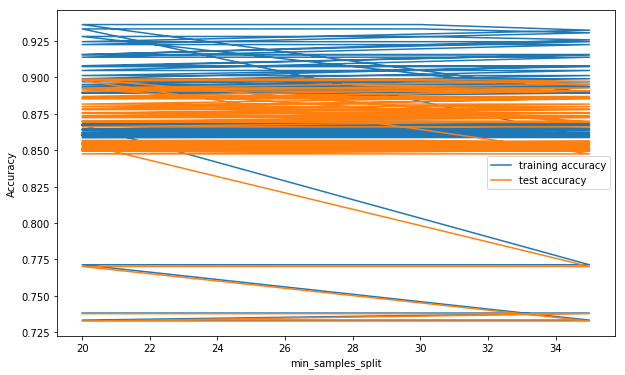

In [542]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(10,6))

plt.plot(cv_results_important_rf["param_min_samples_split"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_min_samples_split"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

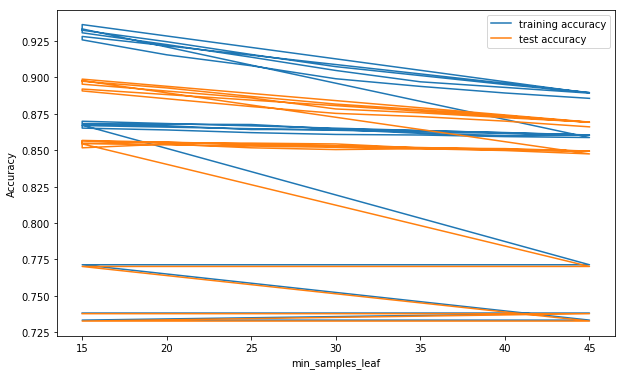

In [543]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_min_samples_leaf"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_min_samples_leaf"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'Accuracy')

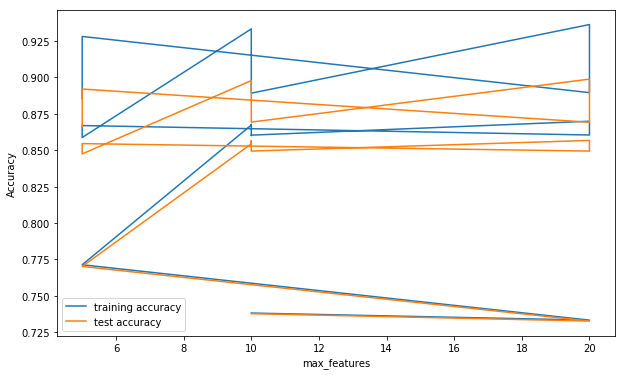

In [544]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_max_features"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_max_features"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()


<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

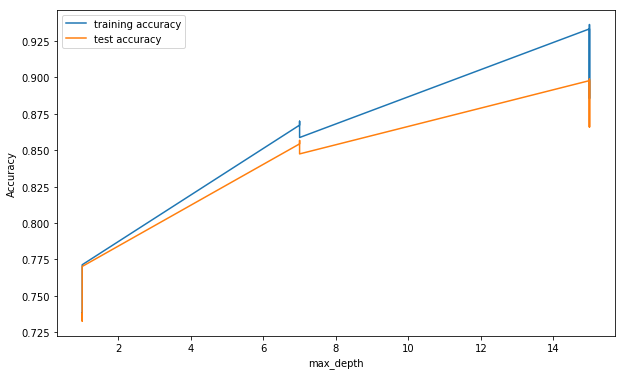

In [545]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_max_depth"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_max_depth"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Accuracy')

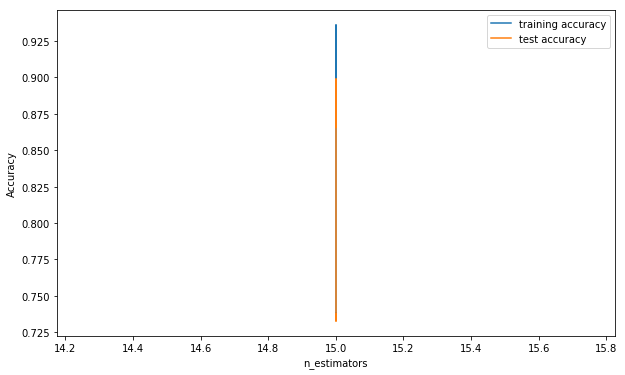

In [546]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_n_estimators"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_n_estimators"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()

## Insights:
1. As max depth increases the scor also increases
2. Other hyper parameters does not affect the scores significantly and cannot come to a final conclusion

In [547]:
# optimal accuracy score and hyperparameters
opt_score = rf_model.best_score_
opt_hyperparams = rf_model.best_params_

print("Optimal Test Score {0} corresponding to hyperparameters {1}".format(opt_score, opt_hyperparams))

Optimal Test Score 0.8988227034616838 corresponding to hyperparameters {'max_depth': 15, 'max_features': 20, 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 15}


In [548]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=15, 
                             min_samples_split=20,
                             max_features=20,
                             n_estimators=15)

In [549]:
# fitting the data
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [550]:
# Predictng the results on x_train
predict_train = rfc.predict(df_train_pca)

# Predicting the results on x_test
predict_test = rfc.predict(df_test_pca)

In [551]:
# Checking results for train data
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     18517
           1       0.94      0.96      0.95     18517

    accuracy                           0.95     37034
   macro avg       0.95      0.95      0.95     37034
weighted avg       0.95      0.95      0.95     37034



In [552]:
# Checking results for test data
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7974
           1       0.39      0.70      0.50       663

    accuracy                           0.89      8637
   macro avg       0.68      0.80      0.72      8637
weighted avg       0.93      0.89      0.91      8637



# Insights:
1. Train data accuracy, precision and recall values are exceptionally good
2. Test data accuracy precision and recall are decent though great

In [553]:
# Print confusion matrix
# Train Data
Con_mat_train = confusion_matrix(y_train,predict_train)
# Test Data
Con_mat_test = confusion_matrix(y_test,predict_test)

In [554]:
# Train Data
TP = Con_mat_train[1,1] # true positive 
TN = Con_mat_train[0,0] # true negatives
FP = Con_mat_train[0,1] # false positives
FN = Con_mat_train[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train, predict_train)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [555]:
Metrics_train = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

Metrics_train

{'Accuracy': 94.7, 'Precision': 94.0, 'Recall': 96.1}

In [556]:
# Train Data
TP = Con_mat_test[1,1] # true positive 
TN = Con_mat_test[0,0] # true negatives
FP = Con_mat_test[0,1] # false positives
FN = Con_mat_test[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_test, predict_test)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [557]:
Metrics_test = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

In [558]:
print(Metrics_train)
print(Metrics_test)

{'Accuracy': 94.7, 'Precision': 94.0, 'Recall': 96.1}
{'Accuracy': 89.4, 'Precision': 39.0, 'Recall': 69.8}


# Conclusion
1. Comparing the results for logistics regression and random forest we can go with logistic regresion with PCA as the recall scores are better
2. Recall helps to increase the chance of true positives and lower fasle negatives

# Find the best predictor

In [559]:
# Response variable
y_2 = highval_final['churn']
# Feature variable
x_2 = highval_final.drop('churn', axis=1)

In [560]:
# Split the data between train and test
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, train_size = 0.7, test_size = 0.3, random_state = 10)

In [561]:
# Balancing - smote
list_column_names = list(x_2.columns)
smt = SMOTE()
x_train_2, y_train_2 = smt.fit_sample(x_train_2, y_train_2)

In [562]:
print('Churn % after smote')
print((y_train_2 != 0).sum()/(y_train_2 == 0).sum())

Churn % after smote
1.0


In [563]:
scaler = StandardScaler()
x_train_2 = scaler.fit_transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)
df_train_2 = pd.DataFrame(x_train_2, columns = list_column_names)

## Using RFE to find the features

In [564]:
logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(df_train_2,y_train_2)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False False  True False  True
 False  True False False False False  True False False  True  True False
 False False False False False False False False False False False False
  True  True False False  True  True False False False False False False
 False  True False  True  True False False False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False  True False False False False False False False False
 False False  True False False False False False False False False False
 False  True False False False False False False False]
[110 109 108  16   8  38   1   6  60   1  79   1  61   1  65  46  36  83
   1  42  73   1   1  74 106 104 105  45  41  63  99  62  53   7  18  72
   1   1   2  55   1   1  54  12  56 103  75  27  11   1  26   1   1

In [565]:
# Variables from RFE
col = df_train_2.columns[rfe.support_]

In [566]:
#1 Assessing the model with stats model
import statsmodels.api as sm
x_train_sm = sm.add_constant(df_train_2[col])
logm1 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37013
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14362.
Date:                Sun, 03 Nov 2019   Deviance:                       28725.
Time:                        21:56:57   Pearson chi2:                 1.42e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3908      0.018    -21.708      0.000      -0.426      -0.355
onnet_mou_8                 -1.2221      0.114    -10.723      0.000      -1.445      -0.999
offnet_mou_8                -1.5148      0.201     -7.525      0.000      -1.909      -1.120
roam_og_mou_8                0.5590      0.044     12.803      0.000       0.473       0.645
loc_og_t2m_mou_8             0.5247      0.104      5.050      0.000       0.321       0.728
loc_og_mou_6                -0.3743      0.034    -10.952      0.000      -0.441      -0.307
std_og_t2t_mou_8             0.8425      0.101      8.344      0.000       0.645       1.040
std_og_t2m_mou_8             1.1487      0.167      6.877      0.000       0.821       1.476
loc_ic_t2t_mou_8             0.8955      0.176      5.091      0.000       0.551       1.240
loc_ic_t2m_mou_8             1.0764      0.235      4.583      0.000       0.616       1.537
loc_ic_mou_7                 1.0361      0.051     20.255      0.000       0.936       1.136
loc_ic_mou_8                -3.4060      0.331    -10.292      0.000      -4.055      -2.757
total_ic_mou_6               0.3576      0.036     10.002      0.000       0.288       0.428
total_ic_mou_8              -0.7957      0.069    -11.516      0.000      -0.931      -0.660
spl_ic_mou_8                -0.4147      0.025    -16.360      0.000      -0.464      -0.365
total_rech_num_8            -0.4615      0.022    -21.119      0.000      -0.504      -0.419
last_day_rch_amt_8          -0.6877      0.025    -26.975      0.000      -0.738      -0.638
fb_user_8                   -0.7648      0.017    -45.849      0.000      -0.798      -0.732
arpu_goodphase               0.4747      0.021     22.187      0.000       0.433       0.517
loc_ic_t2t_mou_goodphase    -0.4412      0.050     -8.768      0.000      -0.540      -0.343
loc_og_t2t_mou_goodphase     0.5144      0.043     11.831      0.000       0.429       0.600
============================================================================================
"""

In [567]:
x_train_sm.columns

Index(['const', 'onnet_mou_8', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8',
       'arpu_goodphase', 'loc_ic_t2t_mou_goodphase',
       'loc_og_t2t_mou_goodphase'],
      dtype='object')

In [568]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features     VIF
2               offnet_mou_8  126.60
7           std_og_t2m_mou_8   87.83
11              loc_ic_mou_8   72.53
9           loc_ic_t2m_mou_8   35.51
4           loc_og_t2m_mou_8   30.60
8           loc_ic_t2t_mou_8   18.79
1                onnet_mou_8   12.85
6           std_og_t2t_mou_8   11.13
13            total_ic_mou_8    6.93
3              roam_og_mou_8    5.31
20  loc_og_t2t_mou_goodphase    4.42
10              loc_ic_mou_7    4.34
19  loc_ic_t2t_mou_goodphase    3.80
5               loc_og_mou_6    3.66
12            total_ic_mou_6    3.15
15          total_rech_num_8    1.56
18            arpu_goodphase    1.50
16        last_day_rch_amt_8    1.21
17                 fb_user_8    1.19
14              spl_ic_mou_8    1.04
0                      const    1.00

In [569]:
# Dropping Columns 
x_train_sm.drop(['offnet_mou_8'], axis = 1, inplace = True)

In [570]:
# 2
x_train_sm.columns

Index(['const', 'onnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8', 'arpu_goodphase',
       'loc_ic_t2t_mou_goodphase', 'loc_og_t2t_mou_goodphase'],
      dtype='object')

In [571]:
#2 Assessing the model with stats model
import statsmodels.api as sm
logm2 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37014
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14392.
Date:                Sun, 03 Nov 2019   Deviance:                       28784.
Time:                        22:01:51   Pearson chi2:                 1.40e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3931      0.018    -21.828      0.000      -0.428      -0.358
onnet_mou_8                 -0.8829      0.095     -9.327      0.000      -1.068      -0.697
roam_og_mou_8                0.2823      0.021     13.506      0.000       0.241       0.323
loc_og_t2m_mou_8            -0.2139      0.036     -6.006      0.000      -0.284      -0.144
loc_og_mou_6                -0.3491      0.034    -10.198      0.000      -0.416      -0.282
std_og_t2t_mou_8             0.5602      0.085      6.580      0.000       0.393       0.727
std_og_t2m_mou_8            -0.1007      0.018     -5.729      0.000      -0.135      -0.066
loc_ic_t2t_mou_8             0.9560      0.178      5.374      0.000       0.607       1.305
loc_ic_t2m_mou_8             1.2464      0.236      5.272      0.000       0.783       1.710
loc_ic_mou_7                 1.0542      0.051     20.491      0.000       0.953       1.155
loc_ic_mou_8                -3.6391      0.334    -10.911      0.000      -4.293      -2.985
total_ic_mou_6               0.3530      0.037      9.597      0.000       0.281       0.425
total_ic_mou_8              -0.8236      0.070    -11.792      0.000      -0.961      -0.687
spl_ic_mou_8                -0.4165      0.025    -16.426      0.000      -0.466      -0.367
total_rech_num_8            -0.4692      0.022    -21.467      0.000      -0.512      -0.426
last_day_rch_amt_8          -0.7032      0.026    -27.578      0.000      -0.753      -0.653
fb_user_8                   -0.7669      0.017    -45.986      0.000      -0.800      -0.734
arpu_goodphase               0.4517      0.021     21.298      0.000       0.410       0.493
loc_ic_t2t_mou_goodphase    -0.4174      0.052     -8.057      0.000      -0.519      -0.316
loc_og_t2t_mou_goodphase     0.4220      0.041     10.367      0.000       0.342       0.502
============================================================================================
"""

In [572]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
10              loc_ic_mou_8  71.74
8           loc_ic_t2m_mou_8  35.07
7           loc_ic_t2t_mou_8  18.63
1                onnet_mou_8  12.38
5           std_og_t2t_mou_8  10.86
12            total_ic_mou_8   6.91
19  loc_og_t2t_mou_goodphase   4.38
9               loc_ic_mou_7   4.34
18  loc_ic_t2t_mou_goodphase   3.80
4               loc_og_mou_6   3.66
11            total_ic_mou_6   3.15
3           loc_og_t2m_mou_8   2.18
14          total_rech_num_8   1.56
17            arpu_goodphase   1.48
6           std_og_t2m_mou_8   1.28
2              roam_og_mou_8   1.23
15        last_day_rch_amt_8   1.21
16                 fb_user_8   1.19
13              spl_ic_mou_8   1.04
0                      const   1.00

In [573]:
## Drop Columns 
x_train_sm.drop(['loc_ic_mou_8'], axis = 1, inplace = True)

In [574]:
# 3
x_train_sm.columns

Index(['const', 'onnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7',
       'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'fb_user_8', 'arpu_goodphase',
       'loc_ic_t2t_mou_goodphase', 'loc_og_t2t_mou_goodphase'],
      dtype='object')

In [575]:
# Assess the model with stats model
import statsmodels.api as sm
logm3 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37015
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14474.
Date:                Sun, 03 Nov 2019   Deviance:                       28948.
Time:                        22:03:42   Pearson chi2:                 1.56e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3790      0.018    -21.334      0.000      -0.414      -0.344
onnet_mou_8                 -0.9176      0.096     -9.607      0.000      -1.105      -0.730
roam_og_mou_8                0.2921      0.021     13.815      0.000       0.251       0.334
loc_og_t2m_mou_8            -0.2016      0.036     -5.599      0.000      -0.272      -0.131
loc_og_mou_6                -0.3686      0.034    -10.835      0.000      -0.435      -0.302
std_og_t2t_mou_8             0.5916      0.086      6.891      0.000       0.423       0.760
std_og_t2m_mou_8            -0.0929      0.017     -5.311      0.000      -0.127      -0.059
loc_ic_t2t_mou_8            -0.7192      0.083     -8.632      0.000      -0.882      -0.556
loc_ic_t2m_mou_8            -1.1332      0.073    -15.524      0.000      -1.276      -0.990
loc_ic_mou_7                 0.8912      0.048     18.519      0.000       0.797       0.985
total_ic_mou_6               0.3834      0.037     10.276      0.000       0.310       0.457
total_ic_mou_8              -1.0909      0.073    -14.975      0.000      -1.234      -0.948
spl_ic_mou_8                -0.4142      0.025    -16.410      0.000      -0.464      -0.365
total_rech_num_8            -0.4567      0.022    -20.990      0.000      -0.499      -0.414
last_day_rch_amt_8          -0.7119      0.025    -27.987      0.000      -0.762      -0.662
fb_user_8                   -0.7766      0.017    -46.778      0.000      -0.809      -0.744
arpu_goodphase               0.4613      0.021     21.789      0.000       0.420       0.503
loc_ic_t2t_mou_goodphase    -0.3577      0.054     -6.654      0.000      -0.463      -0.252
loc_og_t2t_mou_goodphase     0.4361      0.041     10.746      0.000       0.357       0.516
============================================================================================
"""

In [576]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
1                onnet_mou_8  12.37
5           std_og_t2t_mou_8  10.85
11            total_ic_mou_8   6.47
8           loc_ic_t2m_mou_8   4.96
18  loc_og_t2t_mou_goodphase   4.38
9               loc_ic_mou_7   4.17
7           loc_ic_t2t_mou_8   3.80
17  loc_ic_t2t_mou_goodphase   3.78
4               loc_og_mou_6   3.66
10            total_ic_mou_6   3.15
3           loc_og_t2m_mou_8   2.18
13          total_rech_num_8   1.56
16            arpu_goodphase   1.48
6           std_og_t2m_mou_8   1.28
2              roam_og_mou_8   1.23
14        last_day_rch_amt_8   1.20
15                 fb_user_8   1.19
12              spl_ic_mou_8   1.04
0                      const   1.00

In [577]:
## Drop Columns 
x_train_sm.drop(['onnet_mou_8'], axis = 1, inplace = True)

In [578]:
# 4
x_train_sm.columns

Index(['const', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8',
       'arpu_goodphase', 'loc_ic_t2t_mou_goodphase',
       'loc_og_t2t_mou_goodphase'],
      dtype='object')

In [579]:
# Assess the model with stats model
import statsmodels.api as sm
logm4 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37034
Model:                            GLM   Df Residuals:                    37016
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14531.
Date:                Sun, 03 Nov 2019   Deviance:                       29062.
Time:                        22:06:03   Pearson chi2:                 1.51e+05
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3783      0.018    -21.334      0.000      -0.413      -0.344
roam_og_mou_8                0.1875      0.017     10.865      0.000       0.154       0.221
loc_og_t2m_mou_8            -0.2749      0.036     -7.638      0.000      -0.346      -0.204
loc_og_mou_6                -0.2719      0.033     -8.306      0.000      -0.336      -0.208
std_og_t2t_mou_8            -0.2139      0.017    -12.441      0.000      -0.248      -0.180
std_og_t2m_mou_8            -0.0901      0.017     -5.198      0.000      -0.124      -0.056
loc_ic_t2t_mou_8            -0.9034      0.082    -10.958      0.000      -1.065      -0.742
loc_ic_t2m_mou_8            -1.1229      0.073    -15.418      0.000      -1.266      -0.980
loc_ic_mou_7                 0.8877      0.048     18.558      0.000       0.794       0.981
total_ic_mou_6               0.3636      0.037      9.856      0.000       0.291       0.436
total_ic_mou_8              -1.0692      0.072    -14.778      0.000      -1.211      -0.927
spl_ic_mou_8                -0.4123      0.025    -16.363      0.000      -0.462      -0.363
total_rech_num_8            -0.4660      0.022    -21.444      0.000      -0.509      -0.423
last_day_rch_amt_8          -0.7196      0.025    -28.304      0.000      -0.769      -0.670
fb_user_8                   -0.7730      0.017    -46.707      0.000      -0.805      -0.741
arpu_goodphase               0.4699      0.021     22.338      0.000       0.429       0.511
loc_ic_t2t_mou_goodphase    -0.2661      0.055     -4.878      0.000      -0.373      -0.159
loc_og_t2t_mou_goodphase     0.1248      0.027      4.661      0.000       0.072       0.177
============================================================================================
"""

In [580]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features   VIF
10            total_ic_mou_8  6.47
7           loc_ic_t2m_mou_8  4.96
8               loc_ic_mou_7  4.17
16  loc_ic_t2t_mou_goodphase  3.74
6           loc_ic_t2t_mou_8  3.71
3               loc_og_mou_6  3.57
9             total_ic_mou_6  3.14
17  loc_og_t2t_mou_goodphase  2.53
2           loc_og_t2m_mou_8  2.13
12          total_rech_num_8  1.55
15            arpu_goodphase  1.48
5           std_og_t2m_mou_8  1.28
4           std_og_t2t_mou_8  1.26
13        last_day_rch_amt_8  1.19
14                 fb_user_8  1.19
1              roam_og_mou_8  1.13
11              spl_ic_mou_8  1.04
0                      const  1.00

In [581]:
contribution = 100*res4.params.sort_values(ascending = False)/sum(abs(res4.params.values))
contribution

loc_ic_mou_7                 9.869112
arpu_goodphase               5.223978
total_ic_mou_6               4.041799
roam_og_mou_8                2.084027
loc_og_t2t_mou_goodphase     1.386978
std_og_t2m_mou_8            -1.002111
std_og_t2t_mou_8            -2.377657
loc_ic_t2t_mou_goodphase    -2.958765
loc_og_mou_6                -3.022377
loc_og_t2m_mou_8            -3.056664
const                       -4.205960
spl_ic_mou_8                -4.583214
total_rech_num_8            -5.180856
last_day_rch_amt_8          -7.999998
fb_user_8                   -8.594069
loc_ic_t2t_mou_8           -10.042852
total_ic_mou_8             -11.885953
loc_ic_t2m_mou_8           -12.483629
dtype: float64

## Insights:
- The top Features are as follows
  1. loc_ic_t2m_mou_8
  2. loc_ic_t2t_mou_8
  3. total_ic_mou_8
  4. last_day_rch_amt_8
  5. fb_user_8
  6. loc_ic_mou_7
  7. arpu_goodphase
  8. total_ic_mou_6
  9. roam_og_mou_8
  10. loc_og_t2t_mou_goodphase
- MOU (Minutes of Usage) seem to be major predictor of churn
- Action phase data tells more about the churn

## Conclusion:- 

The company can offer data+call plans upgrade offer as minutes of usage comes out to be strong predictor of churn. Since outgoing calls within the same network is one of the strong predictor the company can introduce schemes or offers like night time free or lower call rate for T2T calls, extra talk time or free talk time hours for t2t calls etc. Can ensure the customer service team functions effectively when the number of recharge drops and provide some pesonalized plans to boost the customer satisfaction. 